# Assignment 3 of Sai Durga Mahesh Bandaru

## Problem Description

A store wants to run a campaign that offers 20% discount for 400 to 999 dollars to only valid  existing customers, we need to build a **predictive model** that will predict which customer will purchase the discount offer (gold membership)

All the variables are based on what the customer did in the past 2 years

Dataset is taken from kaggle: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

**Columns:**    <br>

complaints is 1 if customer made a complaint in the last two years, <br>

MntWines is amount spent on wines in the past 2 years in dollars. <br>


recency is the number of days since last purchase. <br>

respone (targets) is 1 if customer accepted the offer in the last campaign<br>

Year_Birth is year in which customer is born <br>

Education is degree of customer<br>

Marital_Status indicates martial status of customer <br>

kidhome and teenhome represents number of kids and teens in customer house <br>

NumDealsPurchases, NumWebPurchases, NumCatalogPurchases and NumStorePurchases represents number of purchases made from deals, website, catalog and store respectively<br>
    

# Abstract


The aim of the Notebook is to create predictive models and interpret them. <br>

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [ ]:
! pip install shap
import shap

! pip install lime

import lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 12.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=851cd2ac159c9c9452542074cde2285ac76a606576f595894d8e8551c6aa2bca
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np

# Fetching data

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/maheshsai252/DatasetsForDSCourse/main/superstore_data.csv'
)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Understanding Numerical and Categorical columns

In [ ]:
# Fetching numerical and categorical columns directly based on dtype inside data frame
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')

In [ ]:
cat_cols=list(set(cols) - set(num_cols))
cat_cols

['Marital_Status', 'Dt_Customer', 'Education']

In [ ]:
#find columns with missing values by comparing original number and reduced number after dropping na columns
def c_missing(df):
    
    c_list = list()
    
    for c in df.columns:
        c_list.append(len(df[c].dropna()))
    
    m_cols = list(df.columns[c_list < np.max(c_list)])
    
    print(f'There are {len(m_cols)} columns missing.\nHere is the list: {m_cols}\n')    
        
    return m_cols

In [ ]:
m_cols=c_missing(df)
m_cols

There are 1 columns missing.
Here is the list: ['Income']



['Income']

In [ ]:

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

df['dt_year'] = df['Dt_Customer'].dt.year
df['dt_month'] = df['Dt_Customer'].dt.month
df['dt_day'] = df['Dt_Customer'].dt.day

In [ ]:
df = df.drop(['Dt_Customer'], axis=1)
df.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

   Recency  MntWines  MntFruits  ...  NumDealsPurchases  NumWebPurchases  \
0        0       189        104  ...                  1                4   
1        0       464          5  ...                  1                7   
2        0       134         11  ...                  1                3   
3        0        10          0  ...                  1                1   
4        0         6         16  ...                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  dt_year  dt_month  dt_day  
0         0     2014         6      16  
1         0     2014         6      15  
2         0     2014         5      13  
3         0     2014        11       5  
4         0     2014         8       4  

[5 rows x 24 columns]

In [ ]:
num_cols = ['Id','Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

In [ ]:
for i in ['Kidhome','Year_Birth', 'dt_year', 'dt_month',
       'dt_day', 'Teenhome','Marital_Status', 'Education','Complain']:
    print("value counts of ",i)
    print()
    print(df[i].value_counts())
    print()

value counts of  Kidhome

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

value counts of  Year_Birth

1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1977    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64

value counts of  dt_year

2013    1189
2014     557
2012     494
Name: dt_year, dtype: int64

value counts of  dt_month

8     211
10    209
3     202
12    202
5     192
1     191
2     187
11    185
4   

## Even though kidhome and teen home looked like continuous variables, their values are distributed between 0, 1 and 2

## Also Year_Birth, dt_day, dt_month, dt_year are all nominal as they take value from fixed set.

## Since these values are discrete, these variables can be considered categorical

In [ ]:
cols=df.columns
cat_cols=list(set(cols) - set(num_cols))
cat_cols

['Response',
 'Year_Birth',
 'Complain',
 'Marital_Status',
 'Kidhome',
 'Education',
 'dt_month',
 'Teenhome',
 'dt_day',
 'dt_year']

In [ ]:
data= df[:]

In [ ]:
data['Income']=data['Income'].fillna(data['Income'].mean())

In [ ]:
Edu=pd.get_dummies(data['Education'],drop_first=True)
Edu.head()

Basic  Graduation  Master  PhD
0      0           1       0    0
1      0           1       0    0
2      0           1       0    0
3      0           1       0    0
4      0           1       0    0

In [ ]:
Marital=pd.get_dummies(data['Marital_Status'],drop_first=True)
Marital.head()

Alone  Divorced  Married  Single  Together  Widow  YOLO
0      0         1        0       0         0      0     0
1      0         0        0       1         0      0     0
2      0         0        1       0         0      0     0
3      0         0        0       0         1      0     0
4      0         0        0       1         0      0     0

In [ ]:
Married=Marital.iloc[:,2]
Together=Marital.iloc[:,4]
Single=Marital.iloc[:,3]
Divorced=Marital.iloc[:,1]
Other=Marital.loc[:,['Widow','Alone','YOLO']].max(axis=1)

In [ ]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'dt_year', 'dt_month', 'dt_day'],
      dtype='object')

In [ ]:
data=pd.concat([data,Edu,Married,Together,Single,Divorced,Other],axis=1)
#Drop columns not needed
data=data.drop(['Year_Birth','Education','Marital_Status',],axis=1)
data.head()

Id   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   1826  84835.0        0         0        0       189        104   
1      1  57091.0        0         0        0       464          5   
2  10476  67267.0        0         1        0       134         11   
3   1386  32474.0        1         1        0        10          0   
4   5371  21474.0        1         0        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  dt_day  Basic  \
0              379              111               189  ...      16      0   
1               64                7                 0  ...      15      0   
2               59               15                 2  ...      13      0   
3                1                0                 0  ...       5      0   
4               24               11                 0  ...       4      0   

   Graduation  Master  PhD  Married  Together  Single  Divorced  0  
0           1       0    0        0         0       0         1  0  
1           1       0    0        0         0       1         0  0  
2           1       0    0        1         0       0         0  0  
3           1       0    0        0         1       0         0  0  
4           1       0    0        0         0       1         0  0  

[5 rows x 30 columns]

In [ ]:
data=data.drop('Id',axis=1)

In [ ]:
data.columns

Index([             'Income',             'Kidhome',            'Teenhome',
                   'Recency',            'MntWines',           'MntFruits',
           'MntMeatProducts',     'MntFishProducts',    'MntSweetProducts',
              'MntGoldProds',   'NumDealsPurchases',     'NumWebPurchases',
       'NumCatalogPurchases',   'NumStorePurchases',   'NumWebVisitsMonth',
                  'Response',            'Complain',             'dt_year',
                  'dt_month',              'dt_day',               'Basic',
                'Graduation',              'Master',                 'PhD',
                   'Married',            'Together',              'Single',
                  'Divorced',                     0],
      dtype='object')

### Final Columns after processing

In [ ]:
cols=['Income','Kidhome',  'Teenhome','Recency','MntWines','MntFruits',
           'MntMeatProducts','MntFishProducts','MntSweetProducts',
              'MntGoldProds','NumDealsPurchases','NumWebPurchases',
       'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                  'Response','Complain','dt_year','dt_month','dt_day','Basic',
                'Graduation','Master','PhD',
                   'Married','Together','Single',
                  'Divorced','Other']

data.columns=cols
orderd_cols=['Income','Basic','Graduation','Master','PhD','Married','Together','Single',
                  'Divorced','Other','Kidhome','Teenhome','Recency','Complain','MntWines','MntFruits','dt_year','dt_month','dt_day',
           'MntMeatProducts','MntFishProducts','MntSweetProducts',
              'MntGoldProds','NumDealsPurchases','NumWebPurchases',
       'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response']
data=data[orderd_cols]
data.head()

Income  Basic  Graduation  Master  PhD  Married  Together  Single  \
0  84835.0      0           1       0    0        0         0       0   
1  57091.0      0           1       0    0        0         0       1   
2  67267.0      0           1       0    0        1         0       0   
3  32474.0      0           1       0    0        0         1       0   
4  21474.0      0           1       0    0        0         0       1   

   Divorced  Other  ...  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         1      0  ...              379              111               189   
1         0      0  ...               64                7                 0   
2         0      0  ...               59               15                 2   
3         0      0  ...                1                0                 0   
4         0      0  ...               24               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  
0                  6                  1         1  
1                  7                  5         1  
2                  5                  2         0  
3                  2                  7         0  
4                  2                  7         1  

[5 rows x 29 columns]

# Training and interpreting Linear Model

In [ ]:
#Scaling numerical columns to have uniform affect on decisions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
cols_to_scale=['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','dt_year','dt_month','dt_day',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])


In [ ]:
import statsmodels.api as sm
model = sm.OLS(data['Response'], data[cols[:-1]]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.666e+30
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:49:28   Log-Likelihood:                          73967.
No. Observations:                2240   AIC:                                 -1.479e+05
Df Residuals:                    2212   BIC:                                 -1.477e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income              -6.418e-17   3.48e-17     -1.845      0.065   -1.32e-16    4.05e-18
Kidhome               2.32e-17   3.19e-17      0.727      0.467   -3.94e-17    8.58e-17
Teenhome            -2.082e-17   2.86e-17     -0.728      0.467   -7.69e-17    3.53e-17
Recency              3.279e-16   2.42e-17     13.542      0.000     2.8e-16    3.75e-16
MntWines            -5.725e-17   3.93e-17     -1.456      0.146   -1.34e-16    1.99e-17
MntFruits              1.6e-16   3.27e-17      4.888      0.000    9.58e-17    2.24e-16
MntMeatProducts     -6.974e-16   4.02e-17    -17.359      0.000   -7.76e-16   -6.19e-16
MntFishProducts      6.418e-17    3.4e-17      1.887      0.059   -2.51e-18    1.31e-16
MntSweetProducts    -2.129e-16   3.25e-17     -6.551      0.000   -2.77e-16   -1.49e-16
MntGoldProds        -3.589e-16   2.91e-17    -12.353      0.000   -4.16e-16   -3.02e-16
NumDealsPurchases   -2.936e-16   3.03e-17     -9.697      0.000   -3.53e-16   -2.34e-16
NumWebPurchases       3.94e-16   3.26e-17     12.082      0.000     3.3e-16    4.58e-16
NumCatalogPurchases  8.066e-16   4.06e-17     19.881      0.000    7.27e-16    8.86e-16
NumStorePurchases    2.875e-16   3.64e-17      7.906      0.000    2.16e-16    3.59e-16
NumWebVisitsMonth    9.107e-18   3.75e-17      0.243      0.808   -6.45e-17    8.27e-17
Response                1.0000   7.42e-17   1.35e+16      0.000       1.000       1.000
Complain             1.459e-15   2.45e-16      5.960      0.000    9.79e-16    1.94e-15
dt_year              6.722e-17   2.85e-17      2.356      0.019    1.13e-17    1.23e-16
dt_month             7.893e-17   2.57e-17      3.076      0.002    2.86e-17    1.29e-16
dt_day              -1.744e-16   2.37e-17     -7.375      0.000   -2.21e-16   -1.28e-16
Basic                3.617e-16   1.69e-16      2.142      0.032    3.06e-17    6.93e-16
Graduation           6.484e-16   7.37e-17      8.800      0.000    5.04e-16    7.93e-16
Master              -3.608e-16   8.84e-17     -4.084      0.000   -5.34e-16   -1.88e-16
PhD                 -7.312e-16   8.51e-17     -8.595      0.000   -8.98e-16   -5.64e-16
Married             -2.103e-16    7.4e-17     -2.842      0.005   -3.55e-16   -6.52e-17
Together            -5.516e-16   7.83e-17     -7.046      0.000   -7.05e-16   -3.98e-16
Single              -6.336e-16   8.32e-17     -7.615      0.000   -7.97e-16    -4.7e-16
Divorced            -2.151e-16   9.69e-17     -2.221      0.026   -4.05e-16   -2.52e-17
==============================================================================
Omnibus:                      156.395   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.548
Skew:              

# Significant predictors based on p-value from OLS:
    
**LOWER THE P-VALUE HIGHER THE SIGNIFICANCE**
    
1. dt_year, 
2. NumStorePurchases, 
3. MntMeatProducts, 
4. MntWines, 
5. Recency, 
6. Teenhome, 
7. NumCatalogPurchases, 
8. dt_month, 
9. NumWebVisitsMonth, 
10. MntGoldProds,
11. Income, 
12. MntFruits

# Similar to p-values, we can interpret the coefficients of regression to identify importance and it's direction

1. Important variables will be having greater absolute coefficient value

2. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase

3. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [ ]:
from sklearn.model_selection import  train_test_split

X = data.loc[:,~data.columns.isin(['Response'])]

y = data['Response']

#Spliting data into Training, Validation set and Test set 

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)


logreg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [ ]:
logreg.coef_

array([[ 0.46794109, -0.92479168,  0.15210819,  0.26940988,  0.80739102,
        -0.73862682, -0.83716358,  0.24320148,  0.29867939,  0.55134732,
         0.18931276, -0.59116494, -0.65912566,  0.2706726 ,  0.42454665,
         0.04127416, -0.58935042, -0.20167106, -0.04774164,  0.20226673,
        -0.0473085 ,  0.02357866,  0.18954607,  0.02123895,  0.02044569,
         0.32048378, -0.50857705,  0.48198224]])

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.304399
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1568
Model:                          Logit   Df Residuals:                     1540
Method:                           MLE   Df Model:                           27
Date:                Sat, 25 Mar 2023   Pseudo R-squ.:                  0.2699
Time:                        19:50:24   Log-Likelihood:                -477.30
converged:                       True   LL-Null:                       -653.72
Covariance Type:            nonrobust   LLR p-value:                 1.825e-58
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income                  0.4654      0.198      2.355      0.019       0.078       0.853
Ba

# Interpretation of model coefficients


**sign of coeeficient decides the direction of result**

Increasing the variable by 1 unit will result in a x increase/decrease in logit(p) or log(p/1-p). 

Now, if log(p/1–p) increases by x, that means that p/(1 — p) will increase by exp(x) = 1-y. This is a y% increase in the odds of getting yes/no

1. Increasing the income by 1 unit our model predictions might tend exp(0.46) = 1.58 i.e., 58 percent increase in the odds of predicting yes 
    **People with good income have more chance of accepting the survey**

2. Increasing the Basic education by 1 unit our model predictions might tend exp(1.66) = 5.25 i.e., 425 percent increase in the odds of predicting No
    **Lack of education might not give good result in our survey** 

3. Increasing the PhD education by 1 unit our model predictions might tend exp(0.82) = 2.27 i.e., 127 percent increase in the odds of predicting Yes
    **People who have PHD education might be good audience for us**

4. Increasing Married by 1 unit our model predictions might tend exp(3.09) = 21.9 i.e., 2090 percent increase in the odds of predicting No
    **People who got married might not be good audience for us**

5. Increasing MntWines by 1 unit our model predictions might tend exp(0.44) = 1.55 i.e., 55 percent increase in the odds of predicting Yes
    **People who buy more wine are good audience**

6. Increasing MntGoldProds by 1 unit our model predictions might tend exp(0.18) = 1.19 i.e., 19 percent increase in the odds of predicting Yes
    **People who buy more Gold might be interested in our program**

7. Increasing Recency by 1 unit our model predictions might tend exp(0.61) = 1.84 i.e., 84 percent increase in the odds of predicting No
    **People who buy recently might not be interested in our program**


<BarContainer object of 28 artists>

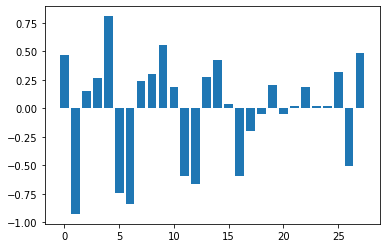

In [ ]:
from matplotlib import pyplot

importance = logreg.coef_[0]

pyplot.bar([x for x in range(len(importance))], importance)

# Feature Importance based on Coefficient

In [ ]:
feat_imp=[]
for i,v in enumerate(logreg.coef_[0]):
    print('Feature: {}, Score: {}'.format(X_train.columns[i],v))
    feat_imp.append((abs(v),X_train.columns[i]))

Feature: Income, Score: 0.46794108655099603
Feature: Basic, Score: -0.9247916762585666
Feature: Graduation, Score: 0.1521081947045502
Feature: Master, Score: 0.2694098815906658
Feature: PhD, Score: 0.8073910241527155
Feature: Married, Score: -0.7386268171872252
Feature: Together, Score: -0.8371635840360738
Feature: Single, Score: 0.24320148076101283
Feature: Divorced, Score: 0.2986793860497979
Feature: Other, Score: 0.5513473228714215
Feature: Kidhome, Score: 0.18931276221757254
Feature: Teenhome, Score: -0.5911649367759914
Feature: Recency, Score: -0.659125659690201
Feature: Complain, Score: 0.2706725985691261
Feature: MntWines, Score: 0.4245466467802088
Feature: MntFruits, Score: 0.0412741571582235
Feature: dt_year, Score: -0.5893504187503249
Feature: dt_month, Score: -0.2016710623298552
Feature: dt_day, Score: -0.04774164396776618
Feature: MntMeatProducts, Score: 0.20226672866922618
Feature: MntFishProducts, Score: -0.04730850319700037
Feature: MntSweetProducts, Score: 0.02357865867

In [ ]:
feat_imp.sort()
feat_imp

[(0.020445694368217835, 'NumWebPurchases'),
 (0.021238945254972087, 'NumDealsPurchases'),
 (0.023578658674053763, 'MntSweetProducts'),
 (0.0412741571582235, 'MntFruits'),
 (0.04730850319700037, 'MntFishProducts'),
 (0.04774164396776618, 'dt_day'),
 (0.1521081947045502, 'Graduation'),
 (0.18931276221757254, 'Kidhome'),
 (0.1895460673630257, 'MntGoldProds'),
 (0.2016710623298552, 'dt_month'),
 (0.20226672866922618, 'MntMeatProducts'),
 (0.24320148076101283, 'Single'),
 (0.2694098815906658, 'Master'),
 (0.2706725985691261, 'Complain'),
 (0.2986793860497979, 'Divorced'),
 (0.32048378314635356, 'NumCatalogPurchases'),
 (0.4245466467802088, 'MntWines'),
 (0.46794108655099603, 'Income'),
 (0.4819822350006409, 'NumWebVisitsMonth'),
 (0.5085770511189913, 'NumStorePurchases'),
 (0.5513473228714215, 'Other'),
 (0.5893504187503249, 'dt_year'),
 (0.5911649367759914, 'Teenhome'),
 (0.659125659690201, 'Recency'),
 (0.7386268171872252, 'Married'),
 (0.8073910241527155, 'PhD'),
 (0.8371635840360738, 'T

## Significant predictors based on regression coefficients

1. 'Recency', 
2. 'Education', 
3. 'NumStorePurchases'
4. 'dt_year'
5. 'Teenhome'
6. 'Martial Status'
7. 'MntMeatProducts' 
8. 'NumWebVisitsMonth' 
9. 'MntGoldProds'
10. 'MntWines'
11. 'Kidhome'
12. 'Income'
13. 'NumCatalogPurchases'
14. 'NumWebPurchases'


***Skew and Kurtosis***

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.4, 4.4 respectively.

***Durbin-Watson***

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.6 which could be interpreted as a positive auto-correlation in the residuals of regression.

***Jarque-Bera Test***

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 289.5 which again re-inforces the interpretation we got from Skew and Kurtosis.

# Training and interpreting Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
cl_tree=DecisionTreeClassifier(criterion='entropy',max_depth=10)
cl_tree=cl_tree.fit(X_train,y_train)

In [ ]:
cl_tree.feature_importances_

array([0.12784075, 0.        , 0.        , 0.        , 0.01339601,
       0.        , 0.        , 0.02651165, 0.0254386 , 0.00823835,
       0.        , 0.00666899, 0.11226412, 0.        , 0.07948659,
       0.00937984, 0.03241003, 0.02644817, 0.07810525, 0.09160631,
       0.03324931, 0.04689905, 0.07195193, 0.01197234, 0.        ,
       0.06367813, 0.03832307, 0.09613151])

In [ ]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, cl_tree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

l = list(zip(feat_dict.values(), feat_dict.keys()))

# Feature Importance using Decision Tree

In [ ]:
l

[(0.1278407467333132, 'Income'),
 (0.11226411641037878, 'Recency'),
 (0.09613151232183736, 'NumWebVisitsMonth'),
 (0.09160630882673217, 'MntMeatProducts'),
 (0.0794865862443617, 'MntWines'),
 (0.07810524755702301, 'dt_day'),
 (0.07195193477827473, 'MntGoldProds'),
 (0.0636781271737945, 'NumCatalogPurchases'),
 (0.046899046033896705, 'MntSweetProducts'),
 (0.038323074925497316, 'NumStorePurchases'),
 (0.03324930674651227, 'MntFishProducts'),
 (0.032410028671745826, 'dt_year'),
 (0.02651165009367065, 'Single'),
 (0.026448172631533755, 'dt_month'),
 (0.025438604856369097, 'Divorced'),
 (0.013396010979640707, 'PhD'),
 (0.011972338391514813, 'NumDealsPurchases'),
 (0.0093798434121361, 'MntFruits'),
 (0.008238348599009565, 'Other'),
 (0.006668994612757768, 'Teenhome'),
 (0.0, 'Basic'),
 (0.0, 'Graduation'),
 (0.0, 'Master'),
 (0.0, 'Married'),
 (0.0, 'Together'),
 (0.0, 'Kidhome'),
 (0.0, 'Complain'),
 (0.0, 'NumWebPurchases')]

## Significant predictors based on feature importances from Decision tree

1. 'Recency'
2. 'MntMeatProducts',
3. 'MntWines',
4. 'NumCatalogPurchases', 
5. 'NumWebVisitsMonth', 
6. 'Income',
7. 'dt_day', 
8. 'MntGoldProds', 
9. 'dt_year', 
10. 'NumStorePurchases', 
11. 'NumDealsPurchases', 
12. 'MntFishProducts', 
13. 'NumWebPurchases'
14. 'Education'

# Visualising nodes of tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
cl_tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
cl_tree=cl_tree.fit(X_train,y_train)

In [ ]:
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg

export_graphviz(
    cl_tree,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")

plt.figure(figsize = (600,80))
imgplot = plt.imshow(img)

plt.show()
     

# Text format


In [ ]:
print(tree.export_text(cl_tree))

|--- feature_0 <= 1.18
|   |--- feature_12 <= -0.26
|   |   |--- feature_25 <= -0.74
|   |   |   |--- class: 0
|   |   |--- feature_25 >  -0.74
|   |   |   |--- class: 0
|   |--- feature_12 >  -0.26
|   |   |--- feature_16 <= -0.77
|   |   |   |--- class: 0
|   |   |--- feature_16 >  -0.77
|   |   |   |--- class: 0
|--- feature_0 >  1.18
|   |--- feature_27 <= -1.57
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 1
|   |--- feature_27 >  -1.57
|   |   |--- feature_20 <= 3.14
|   |   |   |--- class: 1
|   |   |--- feature_20 >  3.14
|   |   |   |--- class: 0



# Examining nodes of tree:

Feature 0 is selected first. If Income < 1.2 then next selected feature is used to split the data. Next NumberOfVisits with greater or less than -0.26 is used to split data. It continues till max deppth is reached or no further features available to select.

Gini index is used as impurity measure.

if value=[1,2], the current node received 1 samples from class 0 & 2 from class 1.


**Importance_Nodeₖ =
(%_of_sample_reaching_Nodeₖ X Impurity_Nodeₖ -
%_of_sample_reaching_left_subtree_NodeₖX Impurity_left_subtree_Nodeₖ-
%_of_sample_reaching_right_subtree_NodeₖX Impurity_right_subtree_Nodeₖ) / 100**

feature importance for feature 

K=

**Σnode’s importance splitting on feature K / Σ all node’s importance**

That means the numerator is a summation of node importances of all nodes that split on a particular feature K upon summation of all node importances

***A root node:*** this is the node that begins the splitting process by finding the variable that best splits the target variable

***Node purity:*** Decision nodes are impure, as they have mixture of both classes of the target variable. Pure nodes are those that have one class.

***Decision nodes:*** these are intermediate nodes, where the target variable is again split further by other variables

***Entropy:***

entropy is a measure of disorder or impurity in a node. Thus, a node with more variable composition, such as 2 yes and 2 no would be considered to have higher Entropy than a node which has only yes or only no. The maximum level of entropy or disorder is given by 1 and minimum entropy is given by a value 0.

***Information Gain***:

E(entorpy) - Avg(E(children))

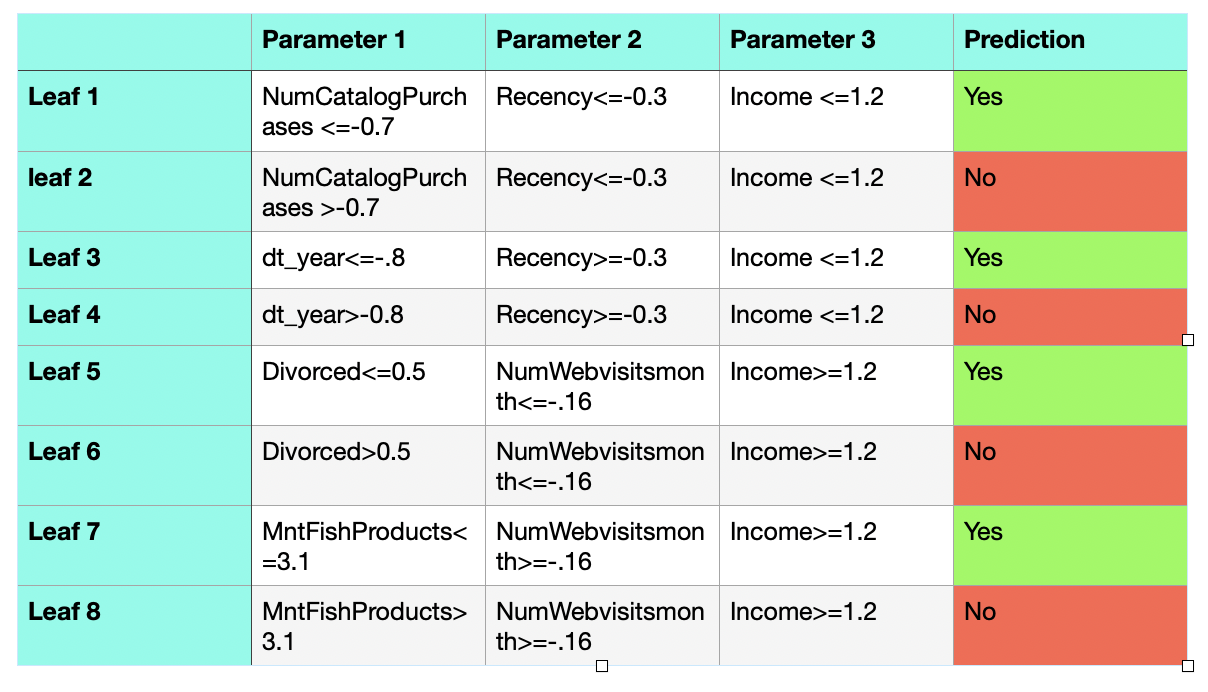

# Interpretation of Linear and tree based models


## Linear based model

In [ ]:
explainer = shap.LinearExplainer(logreg, masker=shap.maskers.Impute(data=X_train),
                           feature_names=X_train.columns, algorithm="linear")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

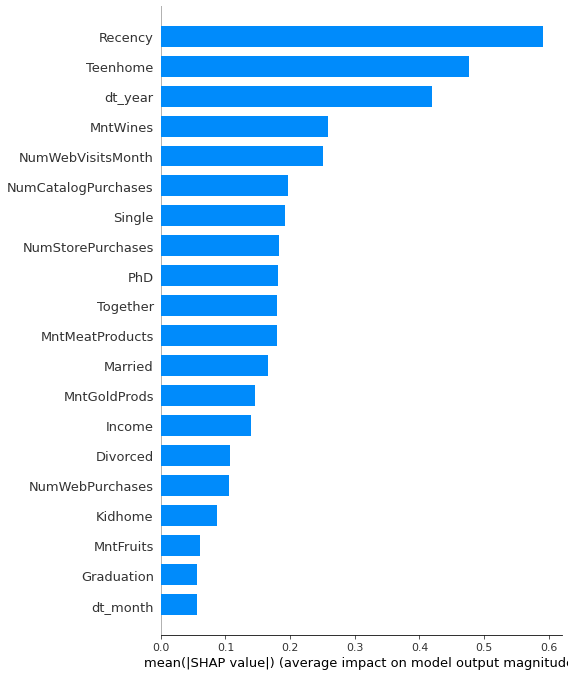

In [ ]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

## The above plot shows the importance of each feature based on mean(|shap|) similar to tree based feature importance plot

In [ ]:
#Linear 

explainer = shap.LinearExplainer(logreg, masker=shap.maskers.Impute(data=X_train),
                           feature_names=X_train.columns, algorithm="linear")
shap_values = explainer(X_test)

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

# waterfall plot

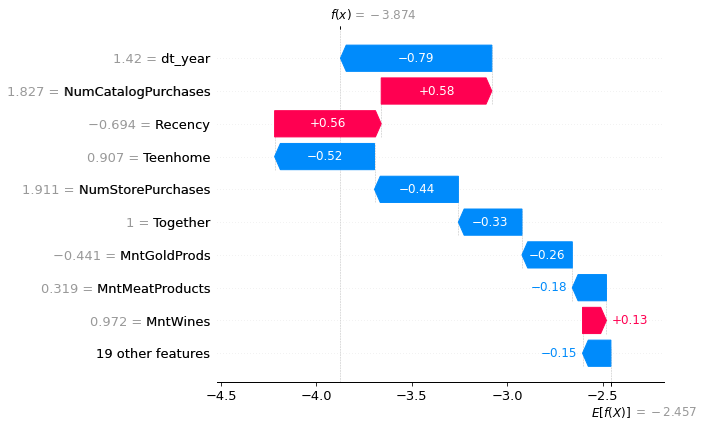

In [ ]:
shap.plots.waterfall(shap_values[0])


***The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature move the model output from our prior expectation under the background data distribution, to the final model prediction given the evidence of all the features***

Expected value or avaerge outcome value is -2.457 and current observation actual value is -3.874

### the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]

1. dt_year dcreased 0.79 units from average predicted value to get the actual 

2. Num catalog purchases was increased by 0.59 to get the actual value


**In this way, for the 1st observation, the predicted outcome is**

**-2.457+ 0.08 - 0.12 - 0.18-0.27-0.33-0.42-0.52... = -.3874**



There will be a unique waterfall plot for every observation in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how the features have contributed to the prediction when compared to the mean prediction. 



# Beeswarm Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


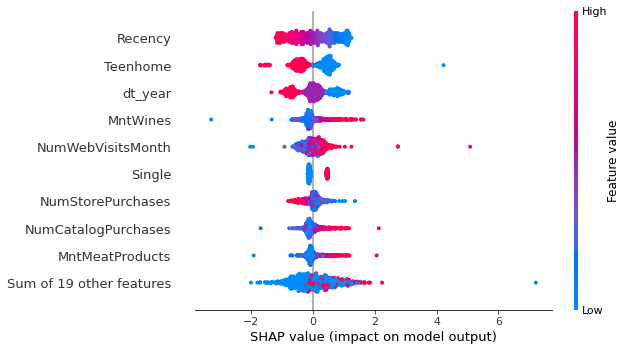

In [ ]:
shap.plots.beeswarm(shap_values)


#For each group, the colour of the points is determined by the feature value (i.e. higher feature values are redder).


**Recency is most influential feature for logistic regression model**

**The higher value of recency leads to prediction of negative outcome. This is explaining same affect we observed in interpretation of coeeficients of regression model.**

**The higher the value of teenhome the lower chance of accepting program**

**The more number of wines he purchased, more chance of acceting program**

**The more number of times user visit site, the higher chance of accepting program**


**All the features in y-axis are sorted by their importance**


# Partial Dependency Plot

Permutation explainer: 1569it [01:01, 19.26it/s]                          


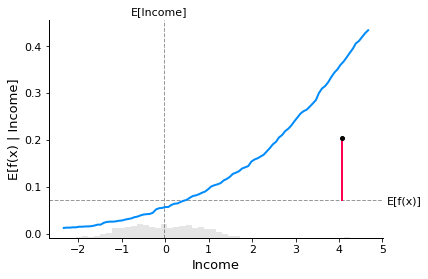

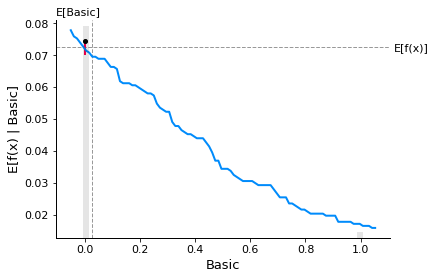

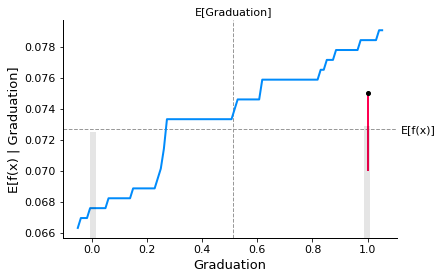

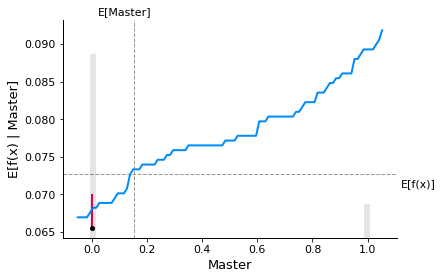

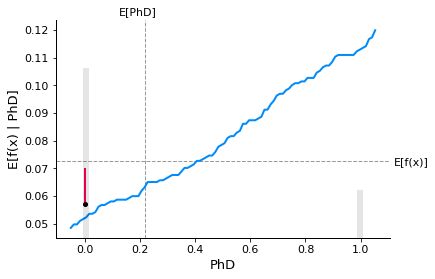

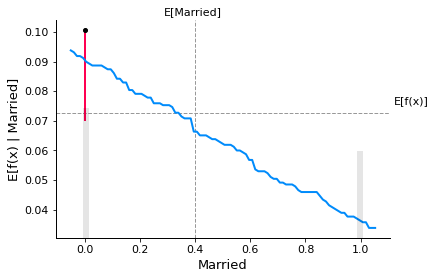

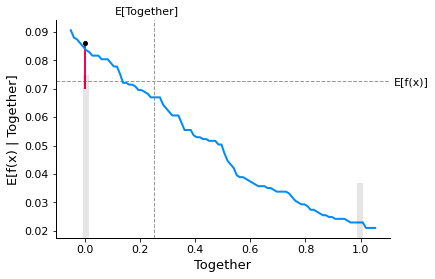

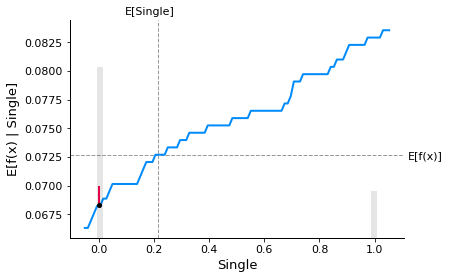

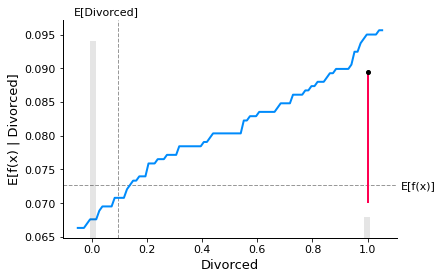

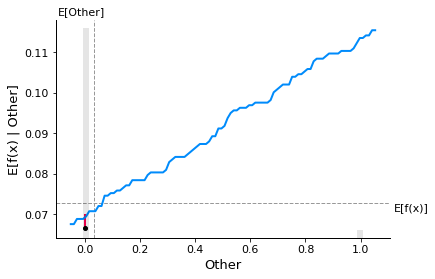

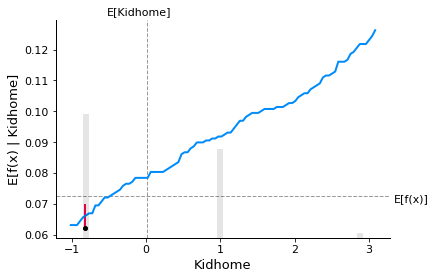

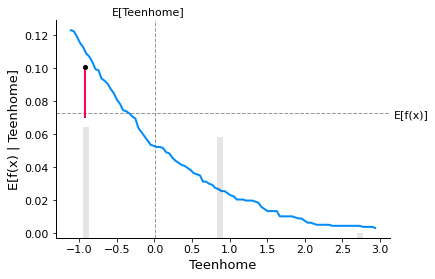

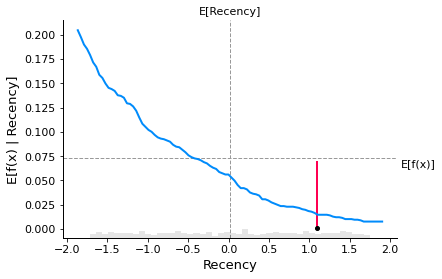

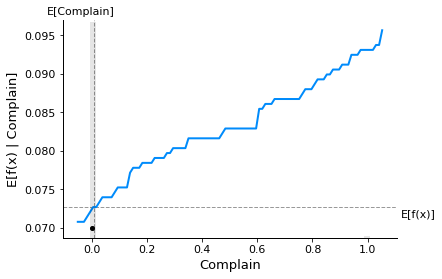

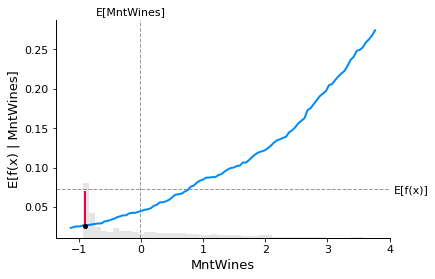

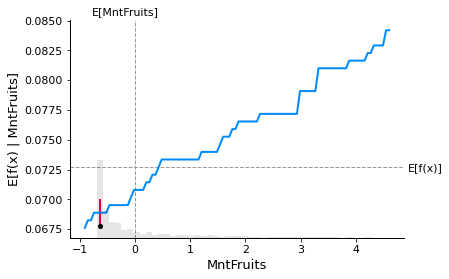

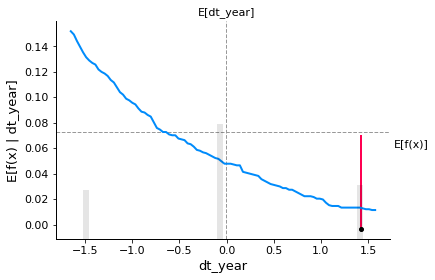

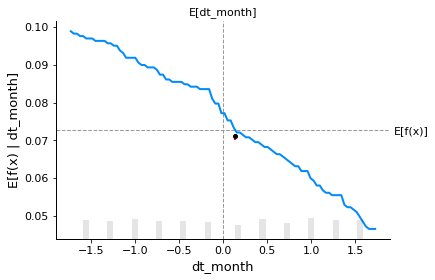

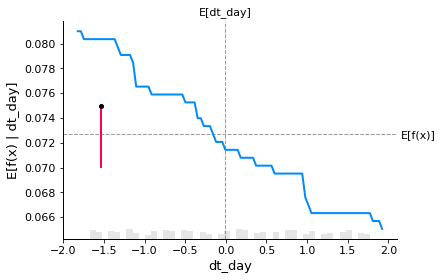

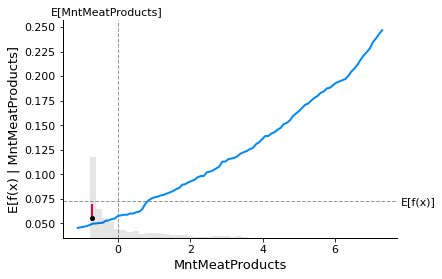

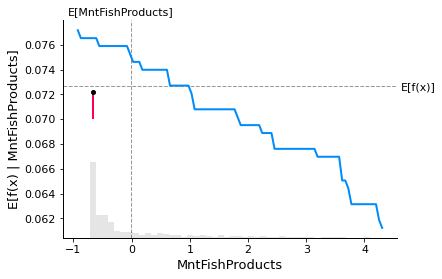

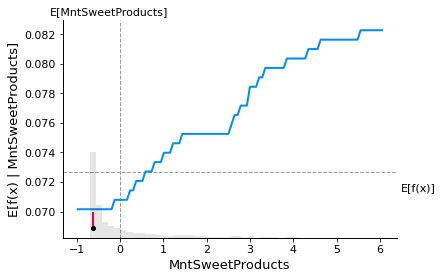

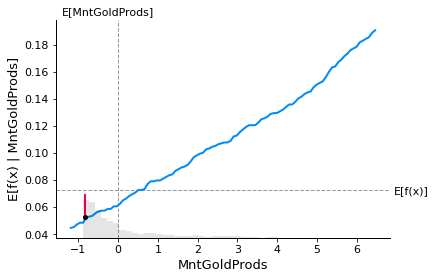

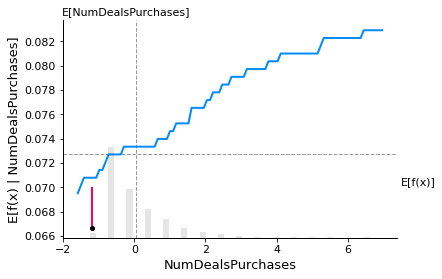

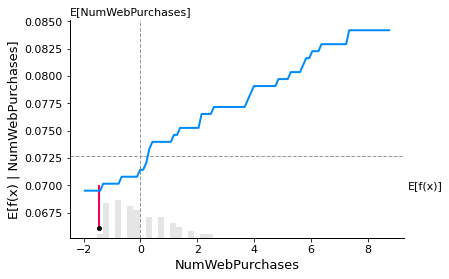

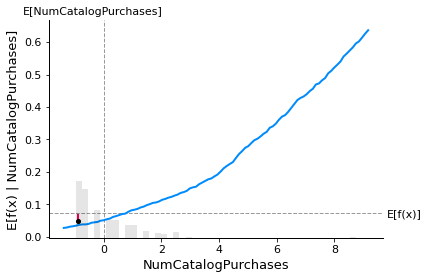

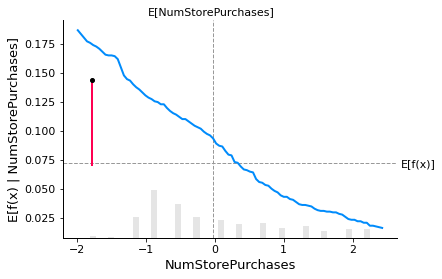

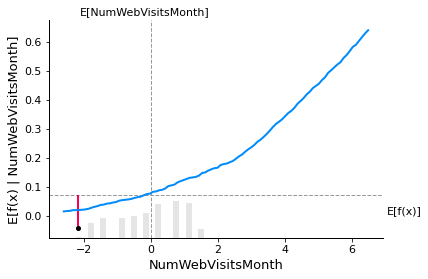

In [ ]:


# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(logreg.predict, X_train)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        logreg.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )



# Dependency plot

Index(['Income', 'Basic', 'Graduation', 'Master', 'PhD', 'Married', 'Together',
       'Single', 'Divorced', 'Other', 'Kidhome', 'Teenhome', 'Recency',
       'Complain', 'MntWines', 'MntFruits', 'dt_year', 'dt_month', 'dt_day',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Income


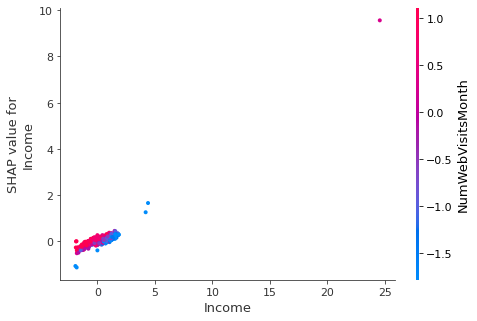

Basic


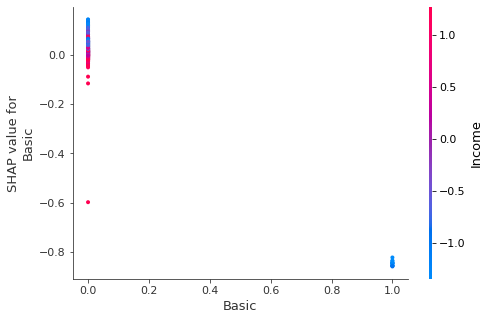

Graduation


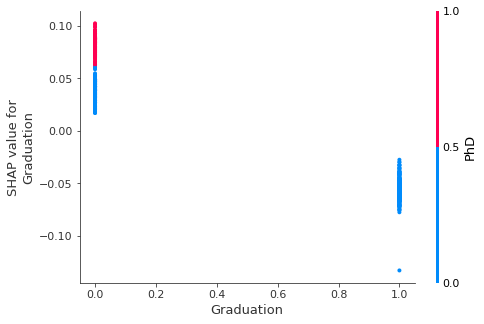

Master


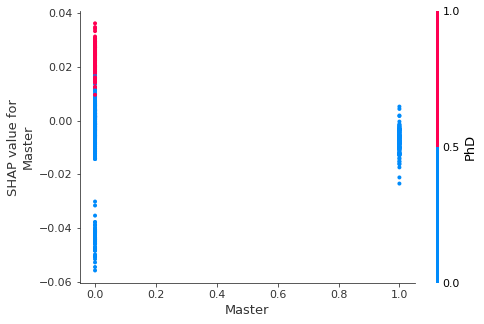

PhD


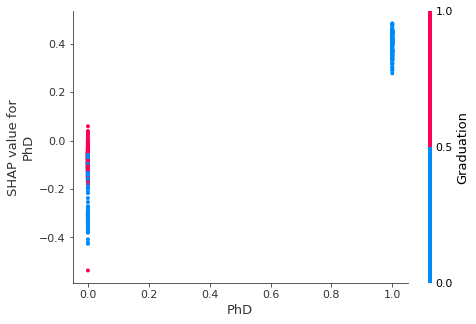

Married


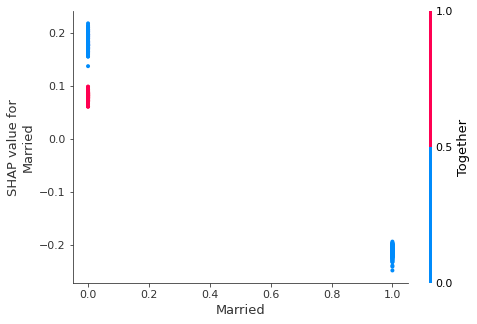

Together


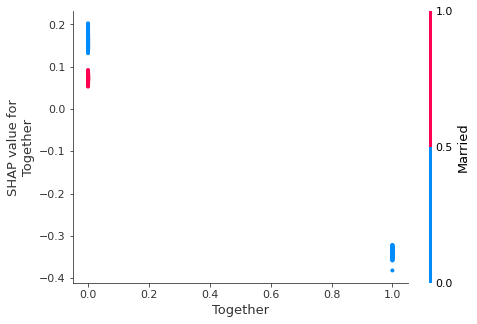

Single


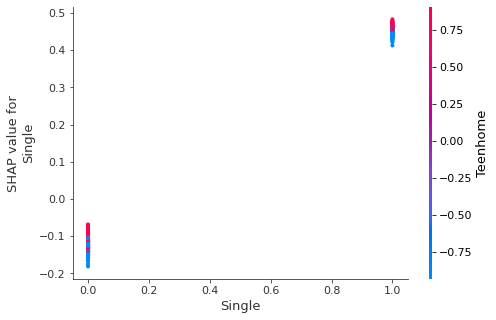

Divorced


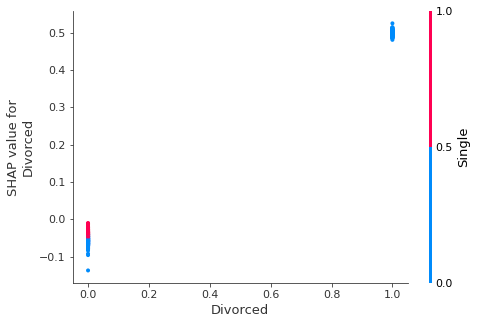

Other


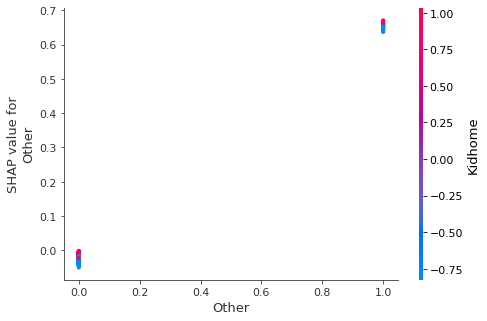

Kidhome


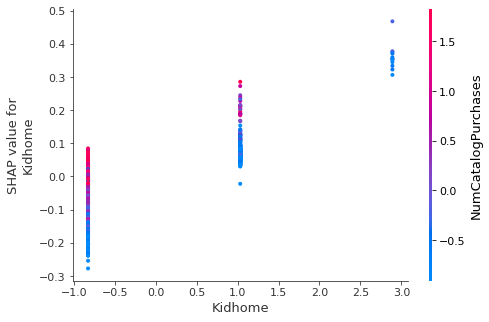

Teenhome


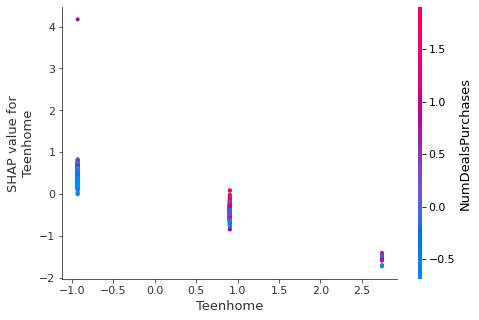

Recency


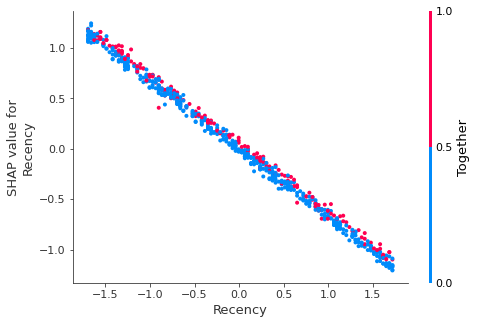

Complain


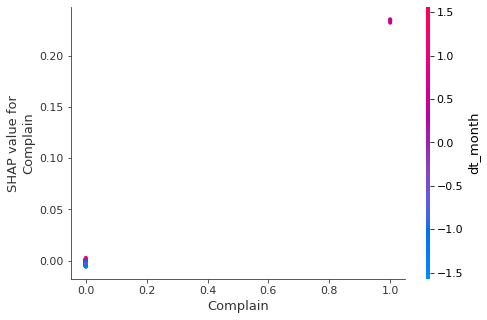

MntWines


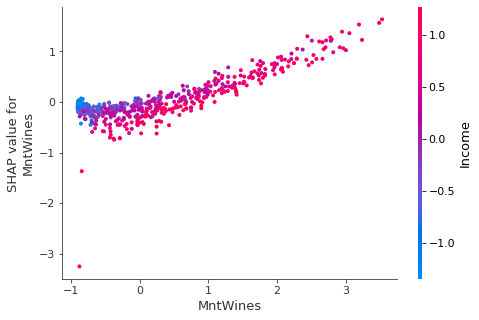

MntFruits


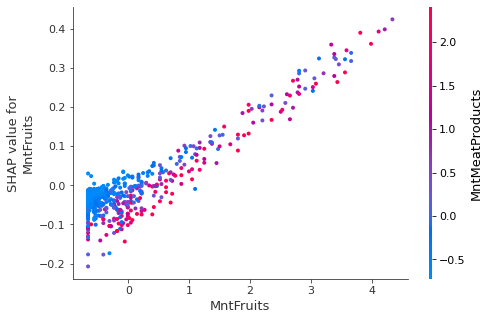

dt_year


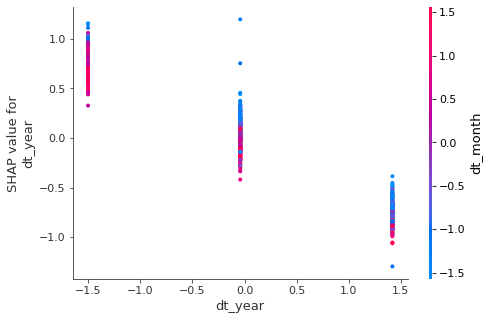

dt_month


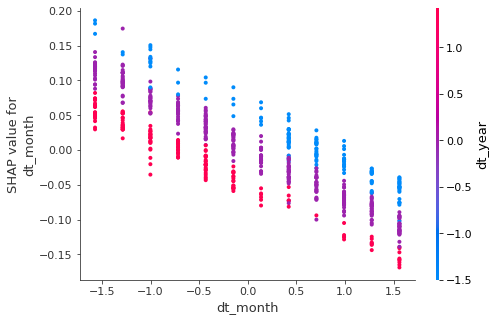

dt_day


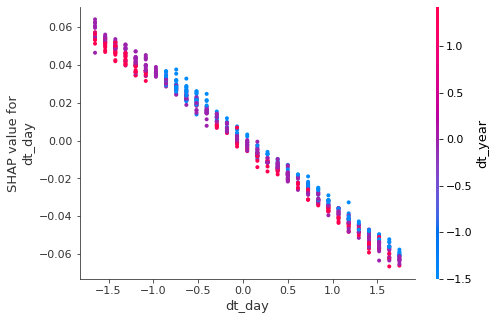

MntMeatProducts


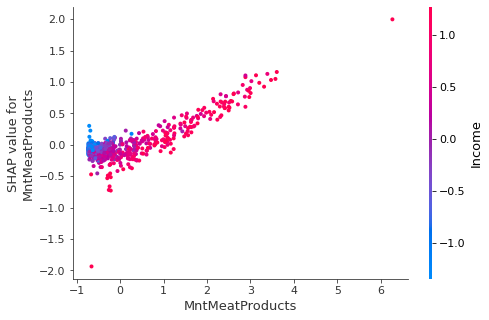

MntFishProducts


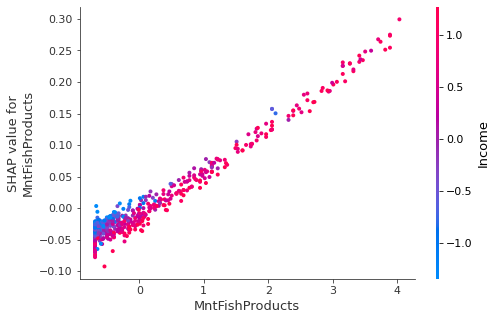

MntSweetProducts


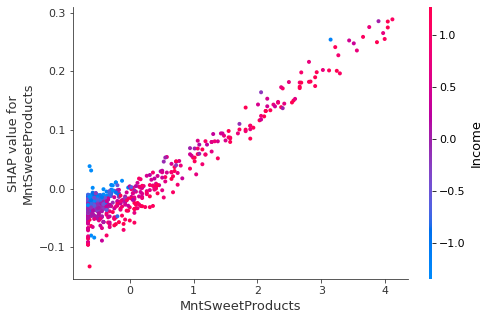

MntGoldProds


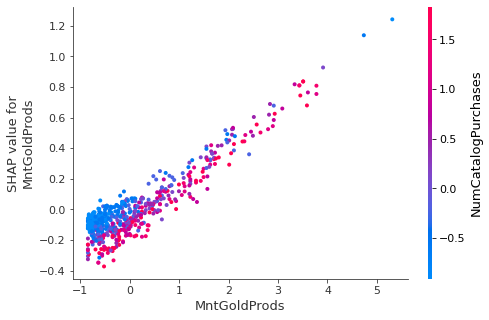

NumDealsPurchases


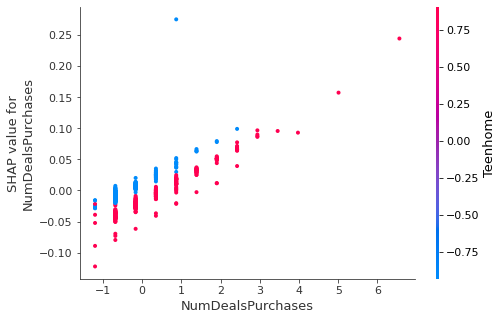

NumWebPurchases


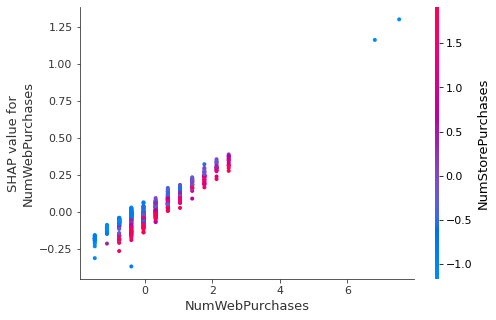

NumCatalogPurchases


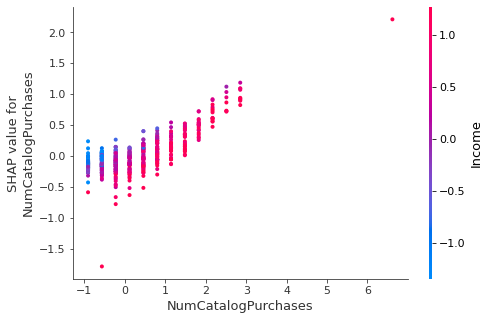

NumStorePurchases


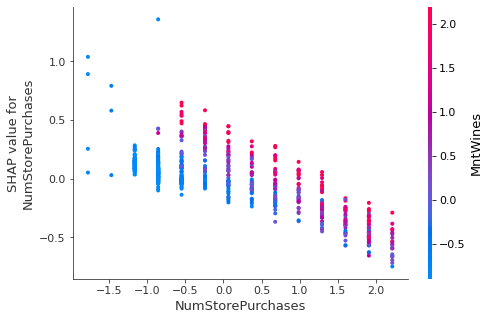

NumWebVisitsMonth


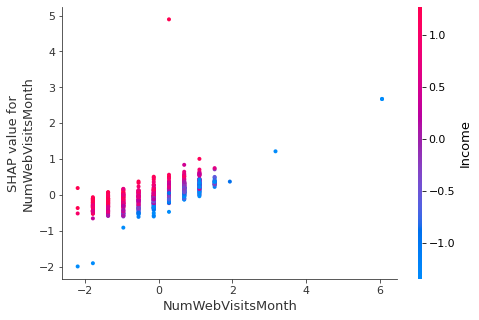

In [ ]:

# SHAP partial dependence plot for linear model
print(X_test.columns)
for i in X_test.columns:
  print(i)
  shap.dependence_plot(i, shap_values, X_test.values,feature_names=X_test.columns)
     

# Interpreting SHAP dependence plot 

The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the SHAP dependence plot. Here in these graphs, we get a dot for every observation in our dataset.

As we can observe the linear model feature and its SHAP value have a linear relationship. If a feature has a positive impact on the prediction then the relationship will be directly proportional e.g. Mntfishproducts and if the feature dereases chances the relationship will be inversely proportional. e.g. dt_month

# Heatmap

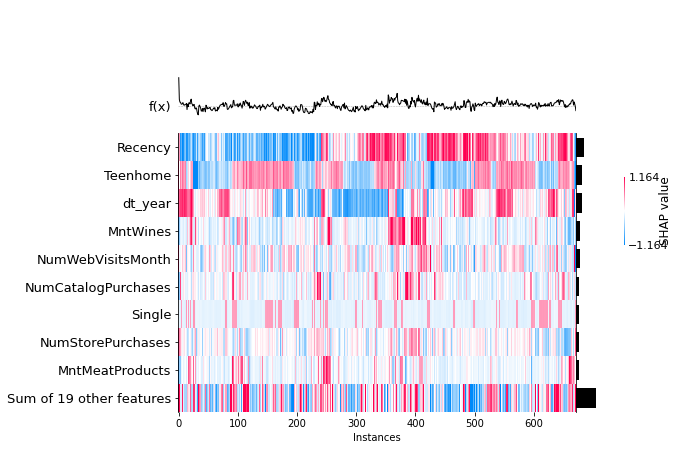

In [ ]:
import shap
shap.plots.heatmap(shap_values)

# Interpreting tree model

# Waterfall plot

Permutation explainer: 1569it [00:34, 28.93it/s]                          


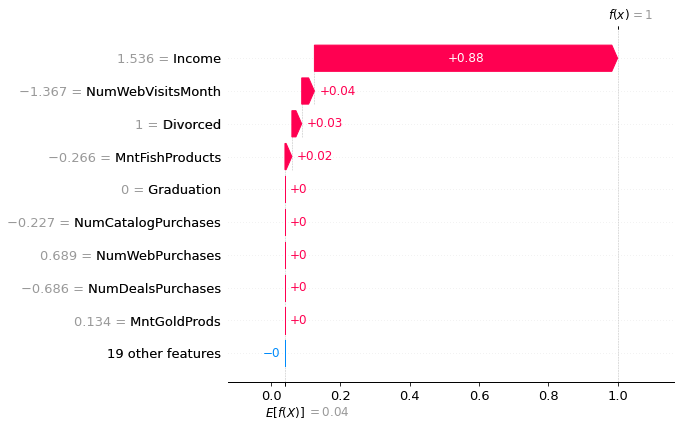

In [ ]:
explainer = shap.Explainer(cl_tree.predict, X_train)
sv = explainer(X_train)

shap.plots.waterfall(sv[1])

***The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature move the model output from our prior expectation under the background data distribution, to the final model prediction given the evidence of all the features***

Expected value or avaerge outcome value is 0.12 and current observation actual value is 1


1. PHD increased 0.34 units from average predicted value to get the actual value

2. income  was increased by 0.28 to get the actual value


**In this way, for the 1st observation, the predicted outcome is**

**0.12 + 0.02 - 0.02 - 0.02-0.02-0.04 +0.34+0.28... = 1**

unlike linear mode, in tree model, major contribution is from phd, income and mnt wines.

There will be a unique waterfall plot for every observation in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how the features have contributed to the prediction when compared to the mean prediction. 



# Beeswarm plot

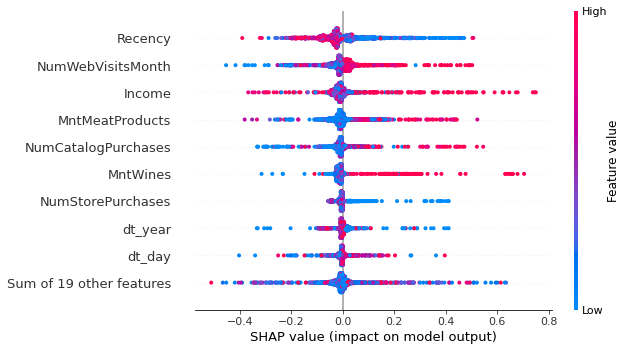

In [ ]:
shap.plots.beeswarm(sv)


**For each group, the colour of the points is determined by the feature value (i.e. higher feature values are redder).**


**Recency is most influential feature for decision tree model**

**The higher value of recency leads to prediction of negative outcome. This is explaining same affect we observed in interpretation of coeeficients of regression model.**

**The higher the value of teenhome the lower chance of accepting program**

**The more amount of meat products purchased, more chance of acceting program**


**The more number of times user visit site, the higher chance of accepting program**

***Income is important but people with large income might or might not accept the program as we see red values on both sides.. Could be outliers existence. But lower income clearly explains the chance of denial to our program***



**All the features in y-axis are sorted by their importance**


#Partial Dependency Plot

Permutation explainer: 1569it [00:37, 29.18it/s]                          


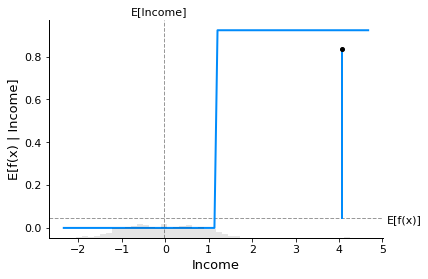

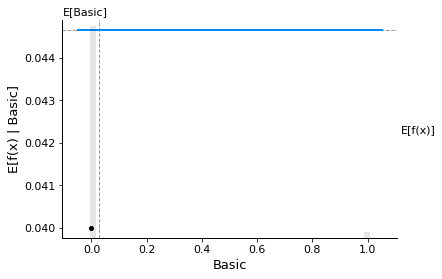

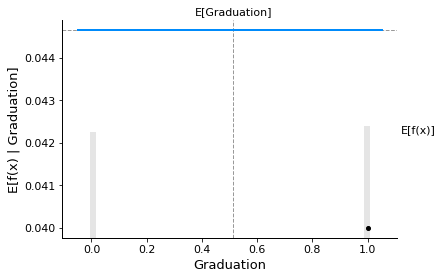

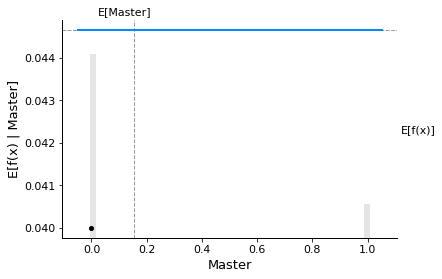

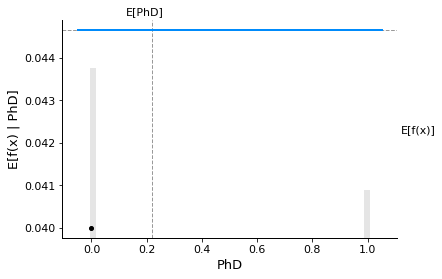

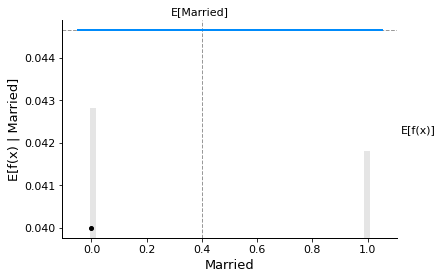

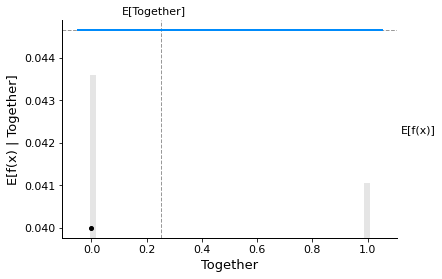

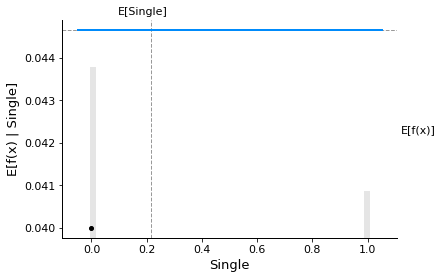

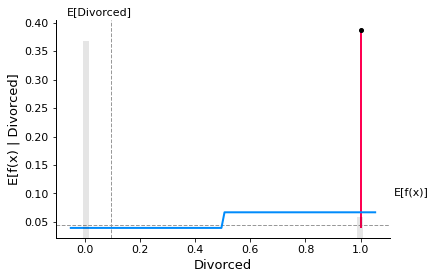

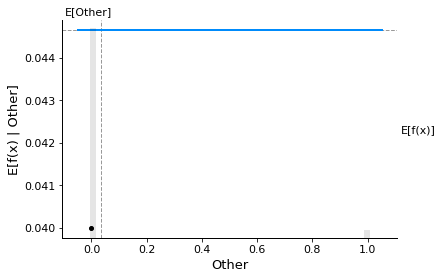

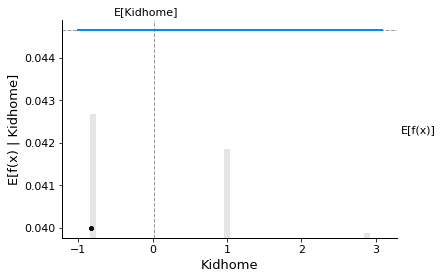

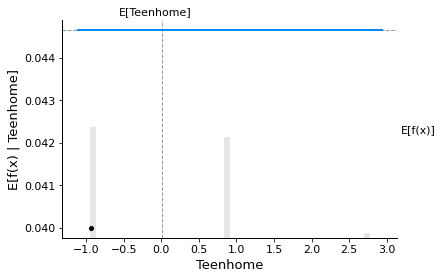

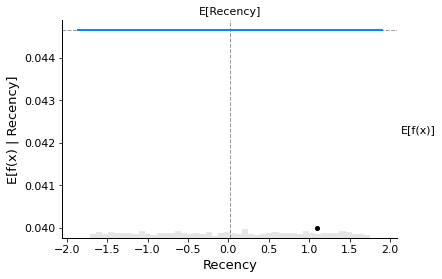

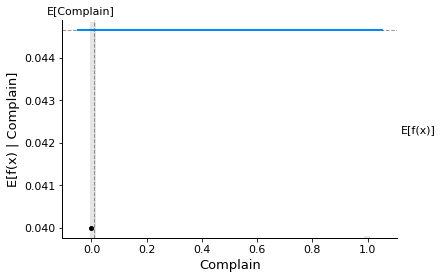

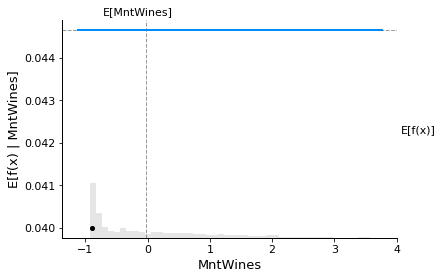

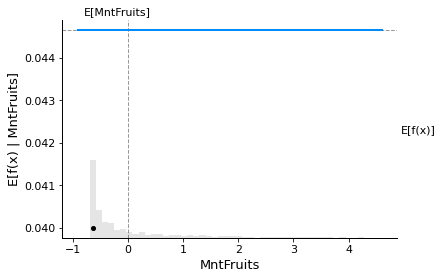

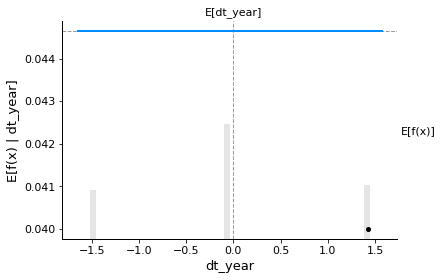

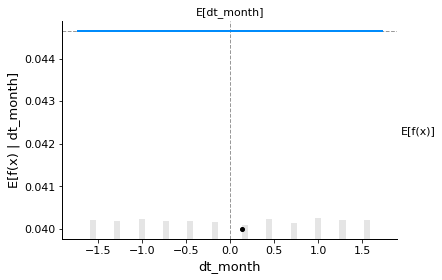

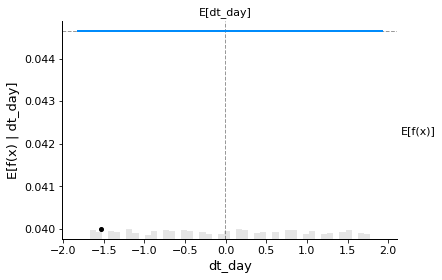

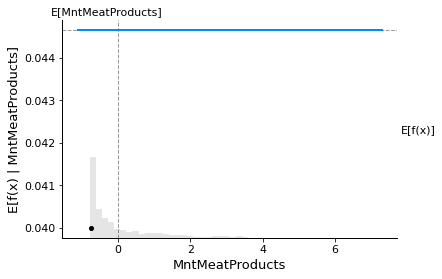

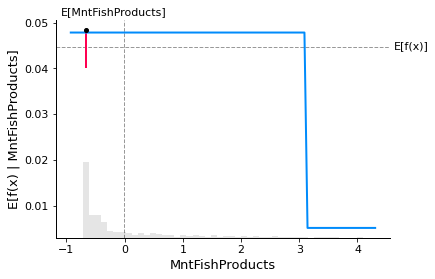

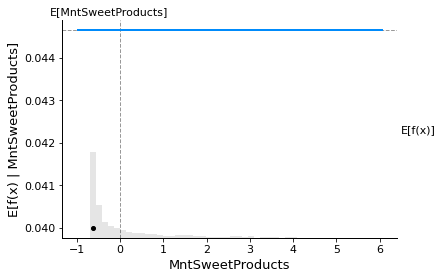

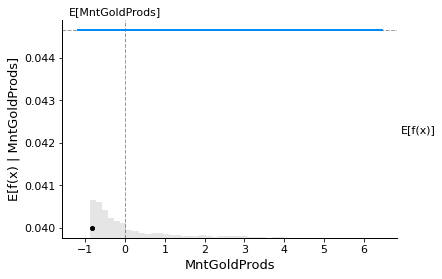

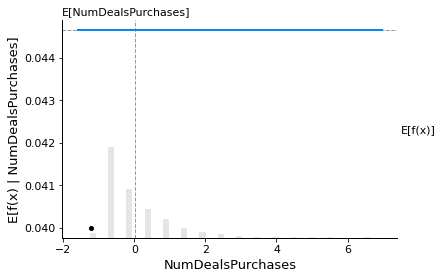

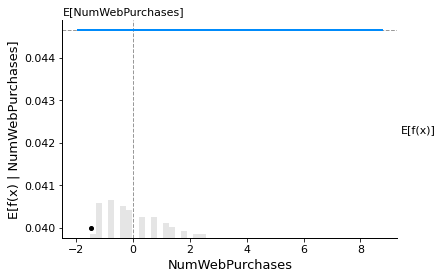

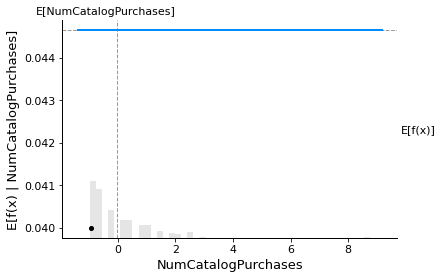

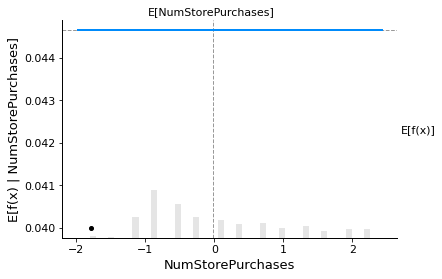

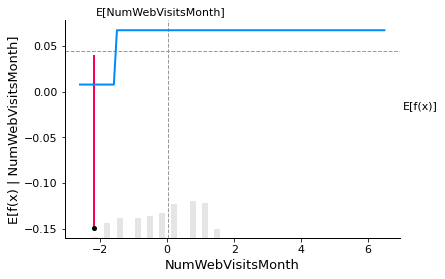

In [ ]:


# SHAP explanation of a tree Model
linear_explainer = shap.Explainer(cl_tree.predict, X_train)
linear_shap_values = linear_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        cl_tree.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )



# Interpretation of PDP for Linear and Tree-Based Models

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of income

For the linear model the cross is made at approx E[f(x)] 0.2
For Tree-based model the cross is made at approx E[f(x)] 0.8

So as the fixed_acidity income the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

#HeatMap

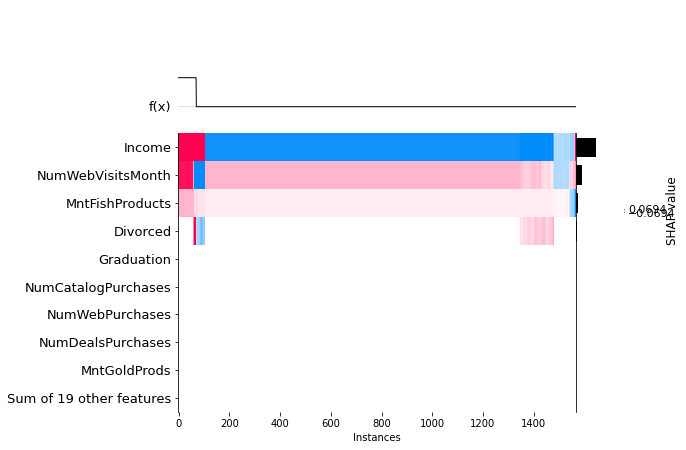

In [ ]:
shap.plots.heatmap(sv)  

# Heatmap Visualization for Linear and Tree-based model

This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the prediction

Here the Y-axis is Features

and X-axis is Instance of that feature

The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

# LIME Interpretation

In [ ]:
from lime import lime_tabular


In [ ]:
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="classification"
)

In [ ]:
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", logreg.predict_proba(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], logreg.predict_proba, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [[0.97965017 0.02034983]]
Actual :      0


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook


# Tree Model

In [ ]:
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), feature_names=X_train.columns, mode="classification"
)
    

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(X_test)
np_y_test = np.array(y_test)
print("Prediction : ", cl_tree.predict_proba(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], cl_tree.predict_proba, num_features=np_x_test.shape[1]
)

     

Prediction :  [[0.74299065 0.25700935]]
Actual :      0


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook


# LIME (Local Interpretation Model-Agnostic Explanation) Analysis

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models

As we can see LIME gives us information about the minimum and maximum values predicted by the model. The Color orange here represents positive and blue represents negative outcome

***Here for this sample dt_year, basic, married, numstorepurchases, numwebvisits had a positive outcome in linear model***

***The recency, complain, dt_year, mntfishproducts, dt_month had a positive outcome in tree model***

***In tree model, income, divorced, mntgold, mntsweet, basic had a negative income***

***In linear model, phd, mntwines, teenhome, divorced has a negative outcome ***

These interpretations were carried out locally in the region where of out sample data(sample_index = 18).


# Selecting model using Auto ML

In [ ]:
!pip install h2o

%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=1e3b6eae07eab597311256beef0aa83fa8d4462d898e1ce936ac3f337ede6a95
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [ ]:
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [ ]:
# Setting up maximum runtime and memory for the AutoML
min_mem_size = 6
run_time = 222
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)


port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

5
Checking whether there is an H2O instance running at http://localhost:48441..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbvo6mc8a
  JVM stdout: /tmp/tmpbvo6mc8a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbvo6mc8a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:48441
Connecting to H2O server at http://127.0.0.1:48441 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_ldjio7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:48441
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [ ]:
data = h2o.import_file( 'https://raw.githubusercontent.com/maheshsai252/DatasetsForDSCourse/main/superstore_data.csv' )
x = ['Id',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain']

y='Response'

data["Response"] = data["Response"].asfactor() #converting response variable to categorical to generate appropriate metrics 


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [ ]:
model_start_time = time.time()
pct_rows = 0.80  # Setting up the data split between training and test dataset.

train,test = data.split_frame([pct_rows])  
aml.train(x=x,y=y,training_frame=train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_205827


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.030525561259053716
RMSE: 0.1747156583110218
LogLoss: 0.12409716382445783
AUC: 0.9960192655027093
AUCPR: 0.9798770827105979
Gini: 0.9920385310054185
Null degrees of freedom: 1784
Residual degrees of freedom: 1779
Null deviance: 1533.9938966033453
Residual deviance: 443.0268748533145
AIC: 455.0268748533145

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38404058917766765
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1487  23   0.0152   (23.0/1510.0)
1      18    257  0.0655   (18.0/275.0)
Total  1505  280  0.023    (41.0/1785.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.384041     0.926126  163
max f2                       0.339466     0.952381  177
max f0point5                 0.48049      0.941271  141
max accuracy                 0.384041     0.977031  163
max precision                0.969887     1         0
max recall                   0.158417     1         251
max specificity              0.969887     1         0
max absolute_mcc             0.384041     0.912581  163
max min_per_class_accuracy   0.339466     0.974172  177
max mean_per_class_accuracy  0.339466     0.974359  177
max tns                      0.969887     1510      0
max fns                      0.969887     274       0
max fps                      6.42658e-05  1510      399
max tps                      0.158417     275       251
max tnr                      0.969887     1         0
max fnr                      0.969887     0.996364  0
max fpr                      6.42658e-05  1         399
max tpr                      0.158417     1         251

Gains/Lift Table: Avg response rate: 15.41 %, avg score: 15.84 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010084                    0.906394           6.49091   6.49091            1                0.933501    1                           0.933501            0.0654545       0.0654545                  549.091   549.091            0.0654545
2        0.0201681                   0.880389           6.49091   6.49091            1                0.891228    1                           0.912364            0.0654545       0.130909                   549.091   549.091            0.130909
3        0.0302521                   0.853225           6.49091   6.49091            1                0.865989    1                           0.896906            0.0654545       0.196364                   549.091   549.091            0.196364
4        0.0403361  

In [ ]:
print(aml.leaderboard)


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_205827  0.886437   0.285967  0.57234                 0.205587  0.301362  0.0908193
StackedEnsemble_AllModels_2_AutoML_1_20230325_205827     0.886012   0.287167  0.569248                0.226388  0.30193   0.0911617
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_205827  0.885198   0.286994  0.564706                0.18528   0.30191   0.0911496
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_205827  0.884001   0.287541  0.565292                0.206574  0.301813  0.0910908
StackedEnsemble_AllModels_4_AutoML_1_20230325_205827     0.882538   0.290642  0.562511                0.207911  0.303544  0.0921391
StackedEnsemble_AllModels_1_AutoML_1_20230325_205827     0.881406   0.290955  0.568152                0.207736  0.302934  0.0917688
StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_205827  0.880629   0.291465

# Finding Best Model with AutoML

In [ ]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

best_model.algo


'stackedensemble'

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_205827': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20230325_205827': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_205827': 2,
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_205827': 3,
 'StackedEnsemble_AllModels_4_AutoML_1_20230325_205827': 4,
 'StackedEnsemble_AllModels_1_AutoML_1_20230325_205827': 5,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230325_205827': 6,
 'StackedEnsemble_AllModels_3_AutoML_1_20230325_205827': 7,
 'GBM_1_AutoML_1_20230325_205827': 8,
 'GLM_1_AutoML_1_20230325_205827': 50}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

8


Best Model is Tree based GBM according to Auto ML

In [ ]:
best_model.algo


'gbm'

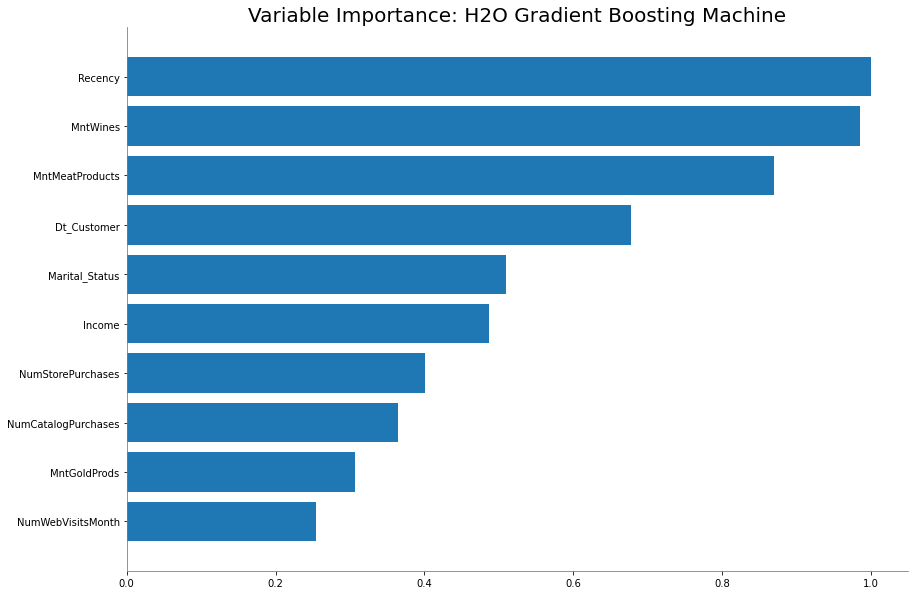

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

"is not" with a literal. Did you mean "!="?
"is not" with a literal. Did you mean "!="?
"is not" with a literal. Did you mean "!="?


50
glm


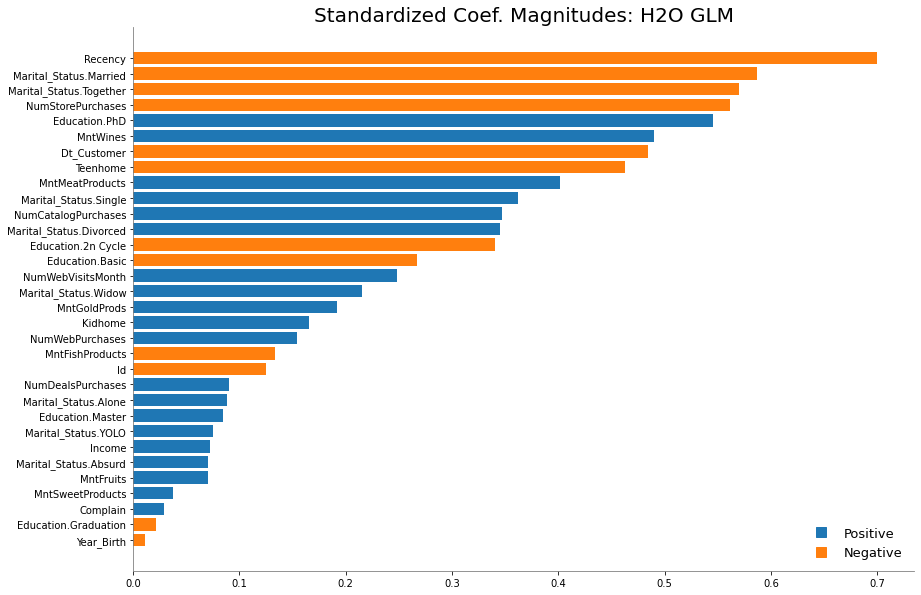

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_4_AutoML_1_20230325_205827     0.886342   0.263692  0.504266                0.2063    0.287248  0.0825111                 924                   0.182629  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230325_205827     0.884416   0.267066  0.500517                0.248844  0.289563  0.0838465                1297                   0.209512  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_205827_model_2              0.884138   0.267322  0.517774                0.260015  0.285173  0.0813234                 265                   0.025075  GBM
XGBoost_grid_1_AutoML_1_20230325_205827_model_17         0.883047   0.266268  0.529793                0.218199  0.28837   0.0831572                1381                   0.0124    XGBoost
GBM_2_AutoML_1_20230325_205827                           0.882169   0.271839  0.485688                0.221623  0.29054   0.0844137                1106                   0.023792  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20230325_205827  0.881142   0.268017  0.505887                0.221623  0.289902  0.0840434                 943                   0.041549  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230325_205827     0.880928   0.26936   0.494044                0.247582  0.290454  0.0843637                 755                   0.066122  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_205827_model_6              0.880179   0.270379  0.499935                0.246854  0.287811  0.0828352                 469                   0.025685  GBM
XGBoost_grid_1_AutoML_1_20230325_205827_model_16         0.879366   0.281782  0.471575                0.224512  0.299981  0.0899886                 188                   0.010901  XGBoost
GBM_3_AutoML_1_20230325_205827                           0.879194   0.278054  0.471978                0.210987  0.295394  0.0872577                 622                   0.022891  GBM
StackedEnsemble_AllModels_2_AutoML_1_20230325_205827     0.878531   0.272449  0.483127                0.215674  0.292059  0.0852986                 649                   0.082008  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_205827_model_14             0.87699    0.273985  0.467173                0.227209  0.291438  0.0849361                 384                   0.022581  GBM
XGBoost_grid_1_AutoML_1_20230325_205827_model_9          0.876862   0.279536  0.499457                0.221794  0.291057  0.0847141                 190                   0.013331  XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_205827  0.87577    0.273872  0.477463                0.225047  0.29331   0.0860309                 816                   0.056008  StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20230325_205827  0.875514   0.271136  0.490096                0.241996  0.291667  0.0850694                 582                   0.073968  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230325_205827  0.875128   0.271611  0.513966                0.253531  0.292281  0.0854279                 599                   0.051552  StackedEnsemble
GBM_grid_1_AutoML_1_20230325_205827_model_20             0.874936   0.27032   0.498834                0.26849   0.286336  0.0819882                 496                   0.024078  GBM
GBM_1_AutoML_1_20230325_205827                           0.874914   0.268944  0.510369                0.216037  0.289057  0.0835538                 876                   0.038006  GBM
GBM_4_AutoML_1_20230325_205827                           0.873673   0.276082  0.495078                0.273904  0.292423  0.0855112                 546                   0.021047  GBM
XGBoost_grid_1_

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_3_AutoML_1_20230325_205827

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3091402892027811
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      352  44   0.1111   (44.0/396.0)
1      20   39   0.339    (20.0/59.0)
Total  372  83   0.1407   (64.0/455.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

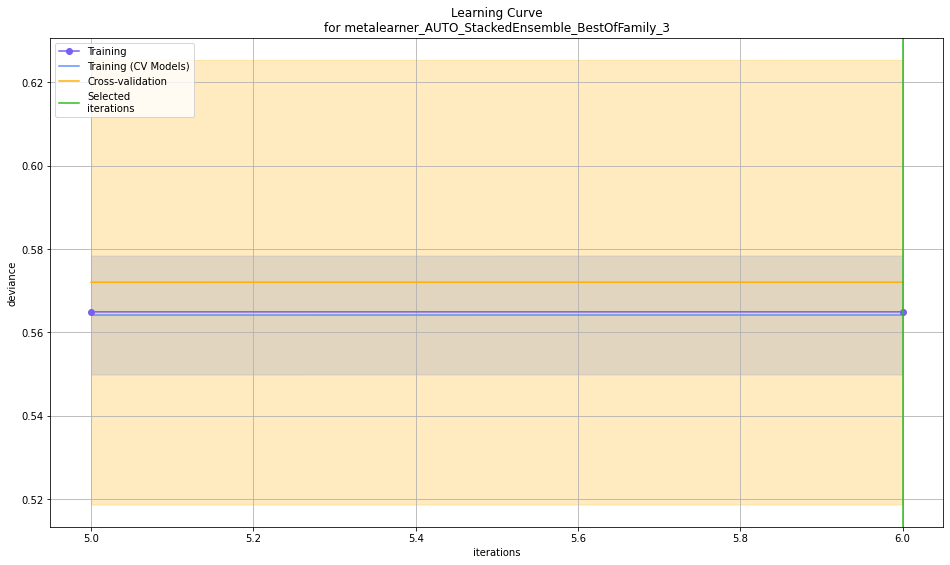

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

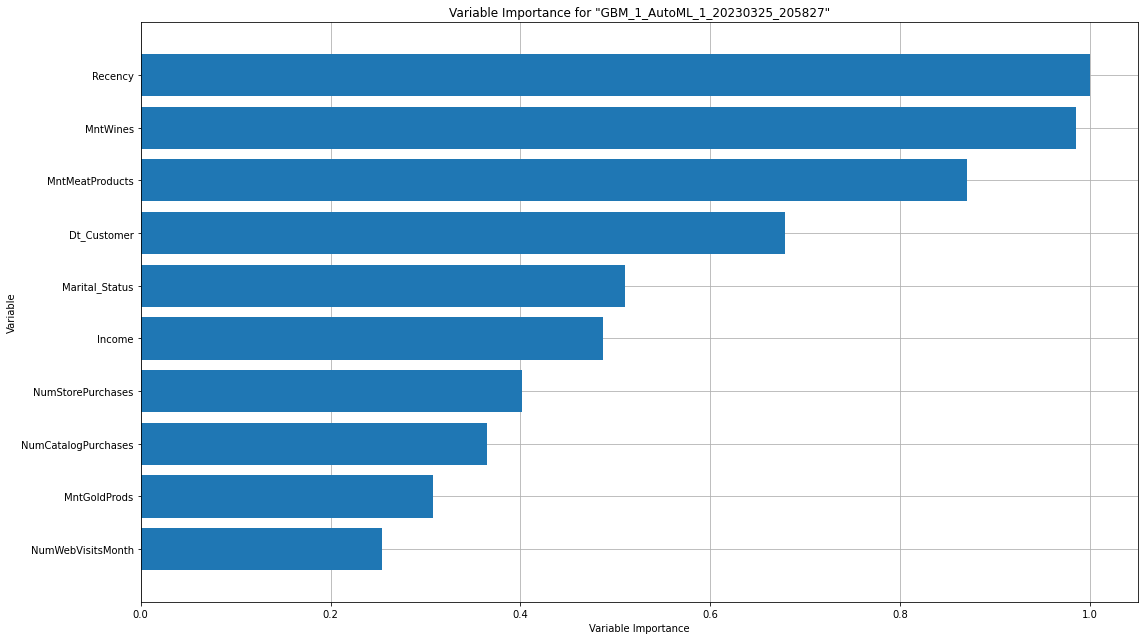

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

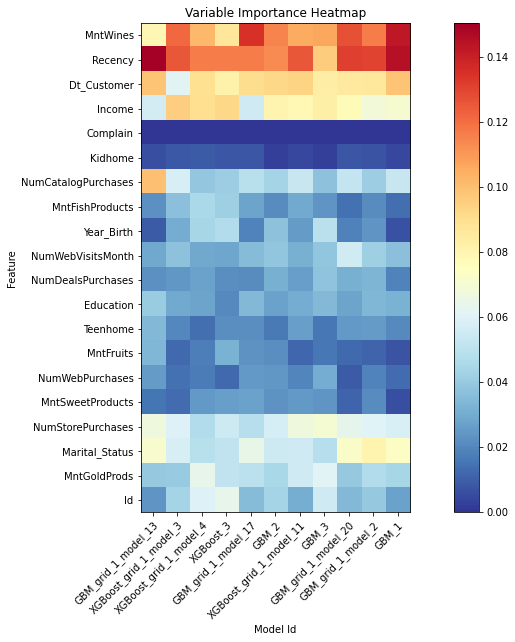

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

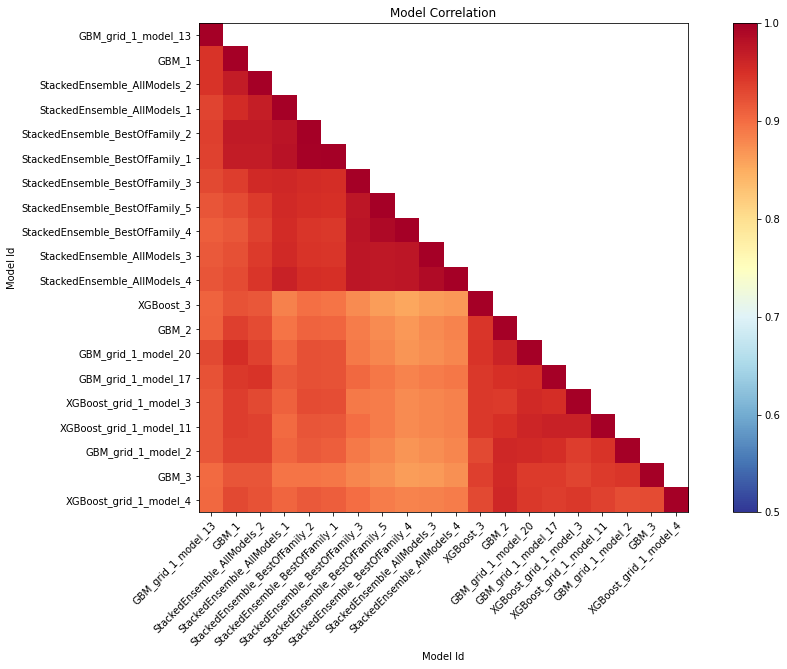

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

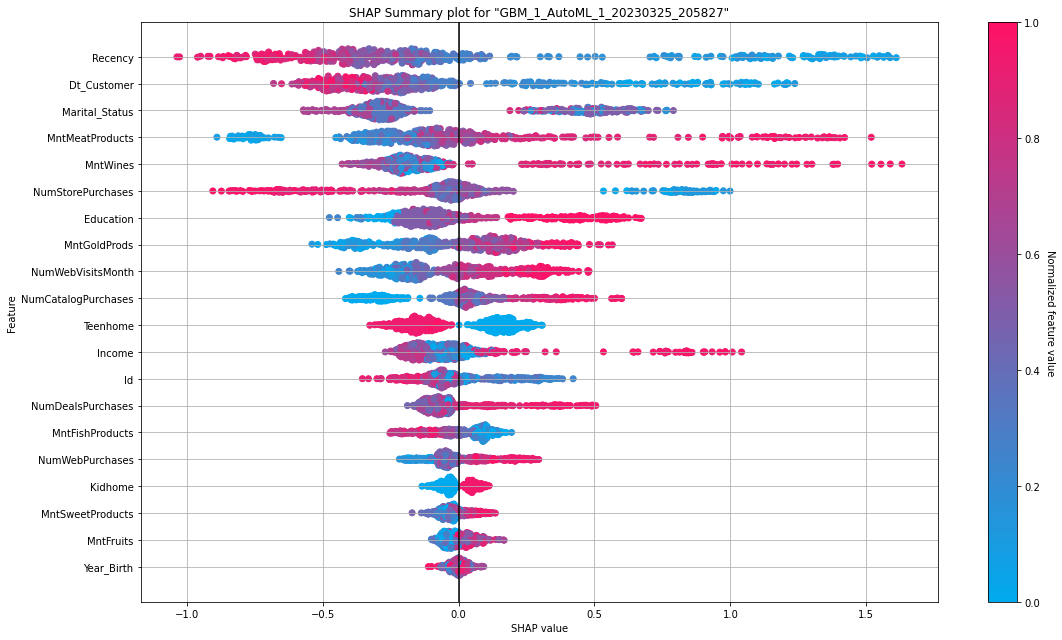

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

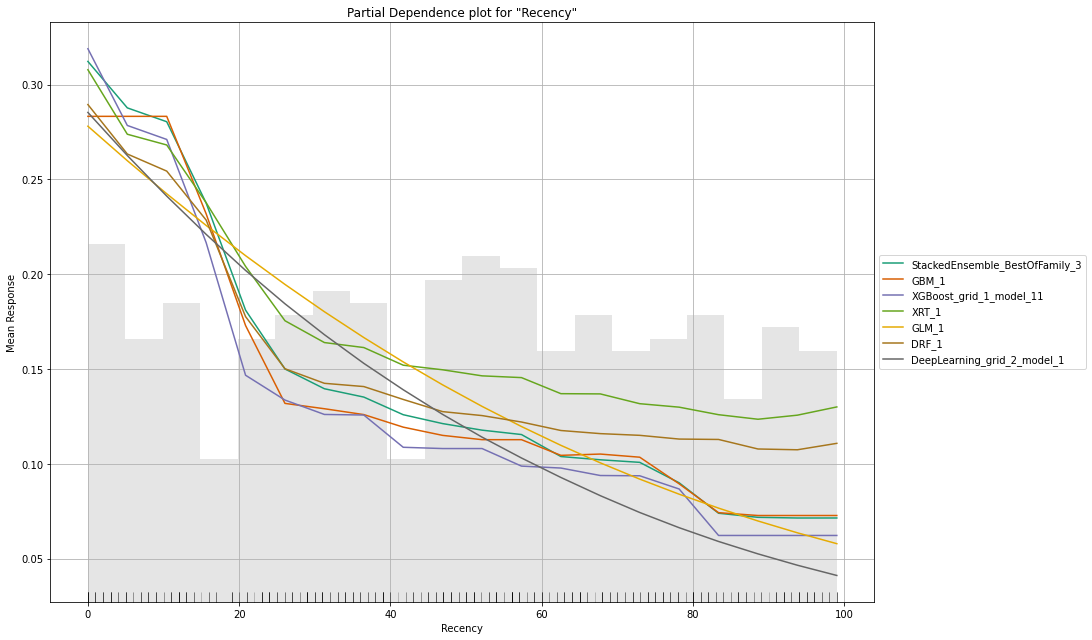

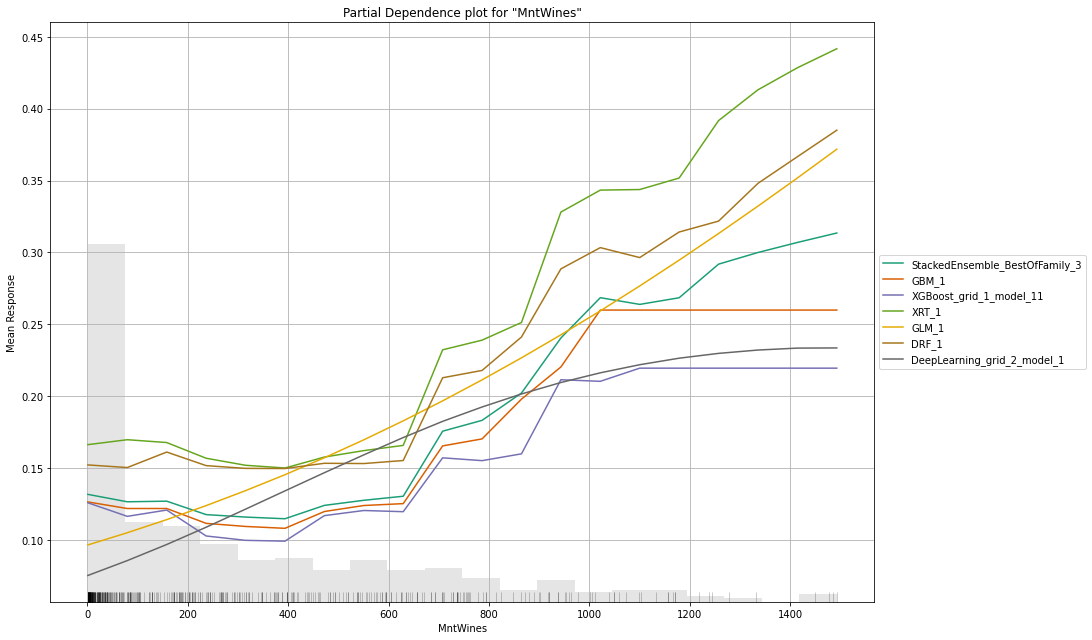

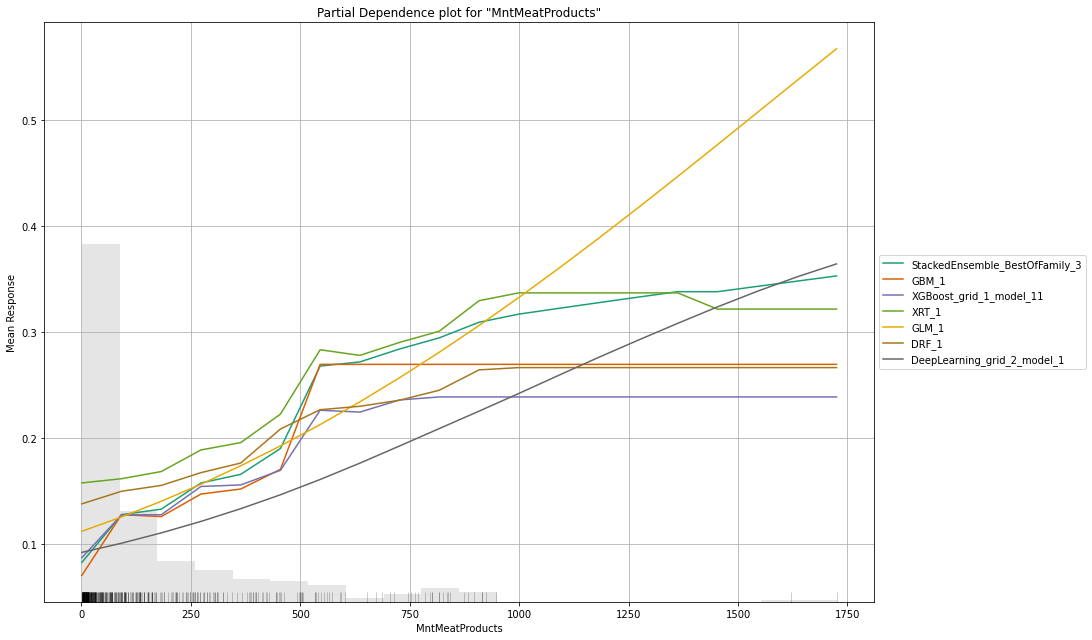

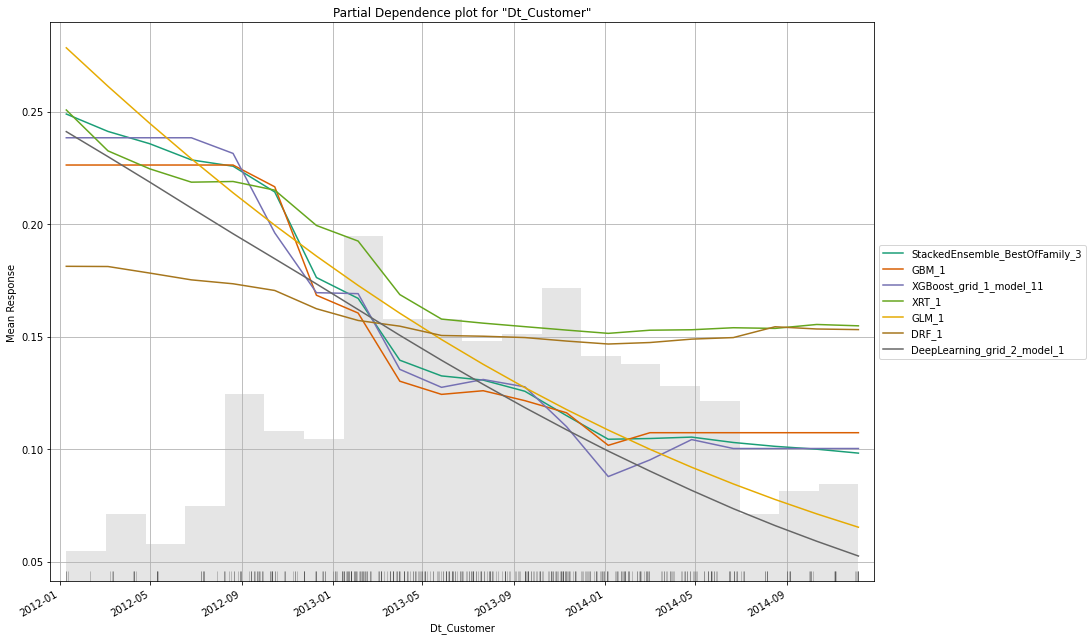

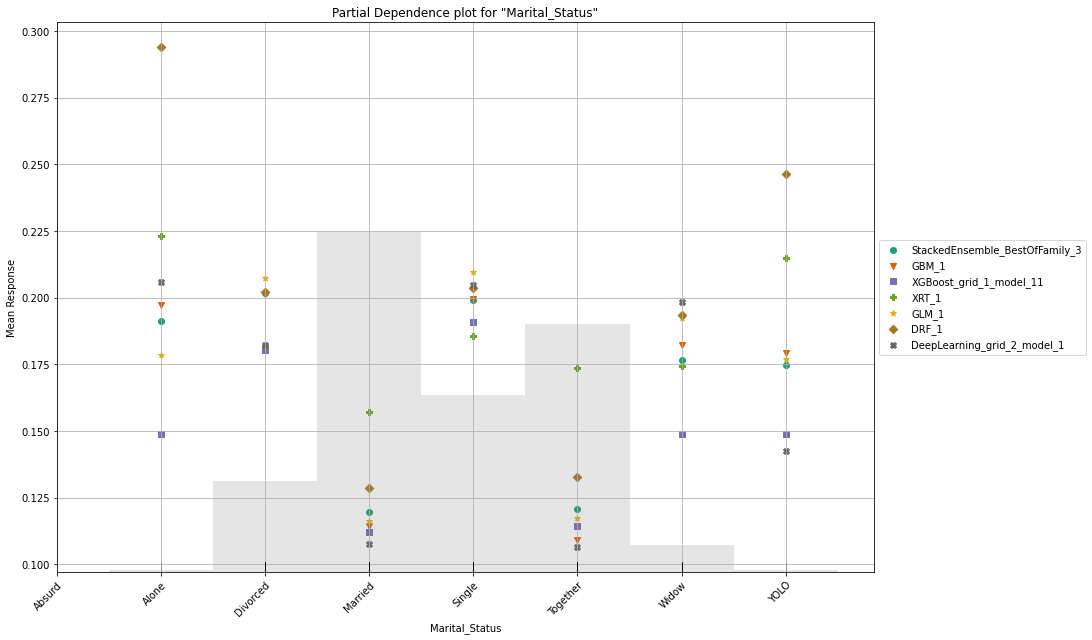

In [ ]:
exa = aml.explain(test)


#Interpreting Best Model from AutoML

### Variable Importance

In the variable importance plot we can observe that the plot replicates the results which we see in Linear and tree model section. The variable importance has been scaled between 0 to 1 for the ease of understanding.

### SHAP Summary

From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is Recency is more significant followed by dt_customer, and so on. Hence, year_birth is the least significant predictor in our model.

The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is.

**Recency is most influential feature for decision tree model**

**The higher value of recency leads to prediction of negative outcome. This is explaining same affect we observed in interpretation of coeeficients of regression model.**

**The customers who joined the site recently has high chance of approving program** 

**The higher the value of teenhome the lower chance of accepting program**

**The more amount of meat products purchased, more chance of acceting program**

**The higher education has high chance of accepting campaign**

**The more number of times user visit site, the higher chance of accepting program**

**Income is important feature. But people with large income might or might not accept the program as we see red values on both sides.. Could be outliers existence. But lower income clearly explains the chance of denial to our program**

**Younger people has high chance of accepting campaign**

###Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Recency and mntwines.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in recency, we can see the response decreases as recency increases. This could be interpreted as this increasing recency could be the deciding factor the range of 45-75 can be significant in the prediction of acceptance. 

2. Similarly when the rest of the variables are kept constant and a marginal change is made in mntwines we can observe the mean response of quality going up continuously with the increase in mntwines. Hence, it can be interpreted that the range of 650 to 800 is deciding factor in the prediction of acceptance. 

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.


# Conclusion

### Comparision between SHAP, LIME, and Partial Dependence Plot Analysis

SHAP and LIME are two methods for interpreting the predictions of black-box machine learning models. While LIME builds a local interpretable model, SHAP uses the concept of Shapley values from game theory to calculate the contribution of each feature to the prediction without building a separate model. This makes SHAP more stable and reliable than LIME, which relies on local linear model assumptions.

PDP provides information about the impact of a single variable on the model's output by keeping all other variables fixed. In contrast, SHAP calculates the contribution of each variable to the prediction without fixing the others. LIME is similar to SHAP, but it focuses on the local region around a specific point of interest, providing information about the contribution of each variable to the output. Ultimately, the choice of the best interpretable method for a machine learning model depends on the specific needs and trade-offs involved.


**References**

Molnar, C. (2022). Interpretable Machine Learning: A Guide for Making Black Box Models Explainable (2nd ed.)
christophm.github.io/interpretable-ml-book/

Notebooks provided in class is used as reference

https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf


https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454


https://medium.com/analytics-vidhya/embedding-your-image-in-google-colab-markdown-3998d5ac2684

https://medium.com/analytics-vidhya/embedding-your-image-in-google-colab-markdown-3998d5ac2684


https://medium.com/data-science-in-your-pocket/how-feature-importance-is-calculated-in-decision-trees-with-example-699dc13fc078

https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c

https://towardsdatascience.com/a-guide-to-interpretable-machine-learning-2-fa3c4489fb53

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c


https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb


LICENSE MIT License

Copyright (c) 2023 Sai Durga Mahesh Bandaru

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.